* In the first hidden layer we must specify the nr of features/dimensions.
* In each layer we must specify the nr of neurons, the parameters initializer (for weights and bias) and activation function.
* We compile the model and specify the optimizer which determines how the weights updation will happen, loss function that needs to be minimized and the metrics which we will use for model evaluation.
* Batch Size specifies the nr of trainig examples that would be processed at a time. Ex batch_size=36 means take 36 perform 1 step of Gradient Descent (forward and backward propagation) using 36 training examples than do the weights updation. Then take next 36 training examples, perform 1 step of Gradient Descent and do the weights updation using the previous weights.
* 1 epoch means processing 1 time the entire training set using Gradient Descent. Nr of batches = total_nr_training_examples / batch_size OR by setting a specific parameter 1 epoch = specific nr of GD iterations.
* After training for a particular nr of epochs we check if the loss and performance metric. If loss is decreasing all the time, it may still decrease if we train for more epochs, so we increase the nr of epochs to train the NN more in order to get a smaller loss (better model).
* When we fit the model, we must specify the training set, either specify a validation set where we validate the model, or we can split the training set into training and validation set using validation_split, batch_size (how many training examples to proceeed with Gradient Descent at a time), and the nr of epochs.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('datasets/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


## Step 1 : Data Preprocessing

In [2]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Encode categorical features
X_train = pd.get_dummies(X_train, columns=['Geography', 'Gender'])
X_test = pd.get_dummies(X_test, columns=['Geography', 'Gender'])


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(8000, 13)
(2000, 13)


## Step 2 : Build Artificial Neural Network (Build a base model)

In [3]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras import initializers

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform', bias_initializer=initializers.Zeros(),
                     activation='relu', input_dim = X_train.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform', bias_initializer=initializers.Zeros(),
                     activation='relu'))

# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', bias_initializer=initializers.Zeros(),
                     activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 16, epochs = 50)

Epoch 1/50
500/500 [==============================] - 1s 2ms/step - loss: 0.5350 - accuracy: 0.7435 - val_loss: 0.4657 - val_accuracy: 0.7845
Epoch 2/50
500/500 [==============================] - 1s 1ms/step - loss: 0.4547 - accuracy: 0.7974 - val_loss: 0.4465 - val_accuracy: 0.8005
Epoch 3/50
500/500 [==============================] - 1s 1ms/step - loss: 0.4402 - accuracy: 0.8050 - val_loss: 0.4331 - val_accuracy: 0.8080
Epoch 4/50
500/500 [==============================] - 1s 2ms/step - loss: 0.4295 - accuracy: 0.8124 - val_loss: 0.4204 - val_accuracy: 0.8135
Epoch 5/50
500/500 [==============================] - 1s 2ms/step - loss: 0.4142 - accuracy: 0.8198 - val_loss: 0.3989 - val_accuracy: 0.8415
Epoch 6/50
500/500 [==============================] - 1s 2ms/step - loss: 0.3939 - accuracy: 0.8359 - val_loss: 0.3793 - val_accuracy: 0.8470
Epoch 7/50
500/500 [==============================] - 1s 2ms/step - loss: 0.3777 - accuracy: 0.8416 - val_loss: 0.3661 - val_accuracy: 0.8550
Epoch 

In [4]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 84        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


Nr of parameters of first hidden layer : nr_neurons_current_layer * nr_features (weights) + 6*1 (bias) = 6 * 13 = 78 + 6*1 = 84 <br>
Nr of parameters of second hidden layer : nr_neurons * nr_neurons_previous_layer - 1 (weights) + 6*1(bias) = 6 * 6 + 6 = 36 + 6 = 42 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


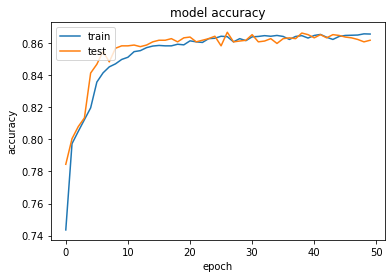

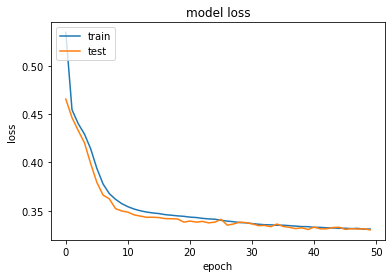

In [5]:
#  Plot the results during training (loss and metric)


print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Step 3 - Model Evaluation

In [6]:
from sklearn.metrics import classification_report, roc_auc_score

In [7]:
# Model Performance on TEST SET

print('.')
loss_test, accuracy_test = classifier.evaluate(X_test, y_test)
print(f'Test Loss : {loss_test}')
print(f'Test Accuracy : {accuracy_test}')

test_pred_prob = classifier.predict(X_test)
test_pred = np.where(test_pred_prob > 0.5, 1, 0)
print(classification_report(y_test, test_pred))

auc_score_test = roc_auc_score(y_test, test_pred)
print(f'AUC Score : {auc_score_test}')

.
63/63 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.8620
Test Loss : 0.3300362825393677
Test Accuracy : 0.8619999885559082
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1595
           1       0.71      0.54      0.61       405

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

AUC Score : 0.7403150276713495


In [8]:
# Model Performance on TRAINING SET

print('.')
loss_train, accuracy_train = classifier.evaluate(X_train, y_train)
# Train Loss corresponds to the loss of last epoch
print(f'Train Loss : {loss_train}')

# Train Accuracy correspons to the accuracy of last epoch
print(f'Train Accuracy : {accuracy_train}')

train_pred_prob = classifier.predict(X_train)
train_pred = np.where(train_pred_prob > 0.5, 1, 0)
print(classification_report(y_train, train_pred))

auc_score_train = roc_auc_score(y_train, train_pred)
print(f'AUC Score : {auc_score_train}')

.
250/250 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.8674
Train Loss : 0.32794228196144104
Train Accuracy : 0.8673750162124634
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6368
           1       0.76      0.51      0.61      1632

    accuracy                           0.87      8000
   macro avg       0.82      0.73      0.77      8000
weighted avg       0.86      0.87      0.86      8000

AUC Score : 0.7339531604098926


## Step 4 : Train Model for more epochs, plot the results and evaluate new model

* We will use the same classifier so we will take the weights that we got after training for 50 epochs, use those weights to train for more epochs. We are not going to start training from beginning.

In [9]:
model_history=classifier.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 16, epochs = 50)

Epoch 1/50
500/500 [==============================] - 1s 1ms/step - loss: 0.3306 - accuracy: 0.8668 - val_loss: 0.3307 - val_accuracy: 0.8635
Epoch 2/50
500/500 [==============================] - 1s 2ms/step - loss: 0.3305 - accuracy: 0.8661 - val_loss: 0.3311 - val_accuracy: 0.8630
Epoch 3/50
500/500 [==============================] - 1s 2ms/step - loss: 0.3307 - accuracy: 0.8645 - val_loss: 0.3339 - val_accuracy: 0.8605
Epoch 4/50
500/500 [==============================] - 1s 2ms/step - loss: 0.3305 - accuracy: 0.8651 - val_loss: 0.3300 - val_accuracy: 0.8655
Epoch 5/50
500/500 [==============================] - 1s 2ms/step - loss: 0.3301 - accuracy: 0.8637 - val_loss: 0.3323 - val_accuracy: 0.8625
Epoch 6/50
500/500 [==============================] - 1s 2ms/step - loss: 0.3297 - accuracy: 0.8658 - val_loss: 0.3337 - val_accuracy: 0.8600
Epoch 7/50
500/500 [==============================] - 1s 2ms/step - loss: 0.3293 - accuracy: 0.8662 - val_loss: 0.3356 - val_accuracy: 0.8595
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


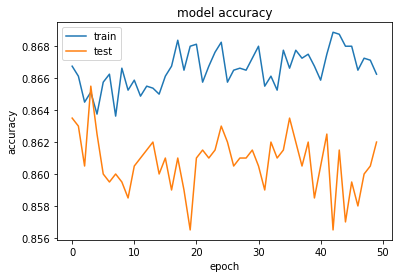

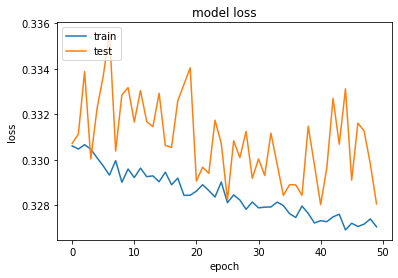

In [10]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
# Model Performance on TEST SET

print('.')
loss_test, accuracy_test = classifier.evaluate(X_test, y_test)
print(f'Test Loss : {loss_test}')
print(f'Test Accuracy : {accuracy_test}')

test_pred_prob = classifier.predict(X_test)
test_pred = np.where(test_pred_prob > 0.5, 1, 0)
print(classification_report(y_test, test_pred))

auc_score_test = roc_auc_score(y_test, test_pred)
print(f'AUC Score : {auc_score_test}')

.
63/63 [==============================] - 0s 1ms/step - loss: 0.3281 - accuracy: 0.8620
Test Loss : 0.32807016372680664
Test Accuracy : 0.8619999885559082
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.71      0.53      0.61       405

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

AUC Score : 0.7384728511165294


In [12]:
# Model Performance on TRAINING SET

print('.')
loss_train, accuracy_train = classifier.evaluate(X_train, y_train)
print(f'Train Loss : {loss_train}')
print(f'Train Accuracy : {accuracy_train}')

train_pred_prob = classifier.predict(X_train)
train_pred = np.where(train_pred_prob > 0.5, 1, 0)
print(classification_report(y_train, train_pred))

auc_score_train = roc_auc_score(y_train, train_pred)
print(f'AUC Score : {auc_score_train}')

.
250/250 [==============================] - 0s 2ms/step - loss: 0.3241 - accuracy: 0.8690
Train Loss : 0.3240715265274048
Train Accuracy : 0.8690000176429749
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6368
           1       0.78      0.50      0.61      1632

    accuracy                           0.87      8000
   macro avg       0.83      0.73      0.76      8000
weighted avg       0.86      0.87      0.86      8000

AUC Score : 0.7308724997536703


## Step 5 : Hyperparameter Tuning using RandomSearch of KerasTuner

* RandomSearch a hyperparameter tuning technique which randomly select n different combinations of hyperparameters, trains the model using those hyperparameters on training data and evaluates it on validation data. The number of hyperparameter combinations is chosen by the user.

In [19]:
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from keras import layers

In [20]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=hp.Int(f'units_{i}',
                                            min_value=6,
                                            max_value=30,
                                            step=5),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [21]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy', # direction='max' to maximize
    max_trials=20,
    directory='directory1',
    project_name='Project_Name1')

In [22]:
tuner.search_space_summary()

In [23]:
# we will split our training data into training (75%) and validation (0.25). Validation set will be used to validate the model in order to find best hyperparameters.
tuner.search(X_train, y_train, epochs=100, validation_split=0.25)

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 0.6381 - accuracy: 0.75 - ETA: 0s - loss: 0.6245 - accuracy: 0.80 - ETA: 0s - loss: 0.6174 - accuracy: 0.80 - ETA: 0s - loss: 0.6122 - accuracy: 0.80 - ETA: 0s - loss: 0.6114 - accuracy: 0.79 - ETA: 0s - loss: 0.6070 - accuracy: 0.79 - 1s 3ms/step - loss: 0.6045 - accuracy: 0.7948 - val_loss: 0.5744 - val_accuracy: 0.7995
Epoch 2/100
188/188 [==============================] - ETA: 1s - loss: 0.6111 - accuracy: 0.78 - ETA: 0s - loss: 0.5642 - accuracy: 0.81 - ETA: 0s - loss: 0.5688 - accuracy: 0.80 - ETA: 0s - loss: 0.5699 - accuracy: 0.79 - ETA: 0s - loss: 0.5654 - accuracy: 0.79 - ETA: 0s - loss: 0.5616 - accuracy: 0.79 - 0s 2ms/step - loss: 0.5592 - accuracy: 0.7948 - val_loss: 0.5382 - val_accuracy: 0.7995
Epoch 3/100
188/188 [==============================] - ETA: 0s - loss: 0.4462 - accuracy: 0.93 - ETA: 0s - loss: 0.5442 - accuracy: 0.79 - ETA: 0s - loss: 0.5391 - accuracy: 0.79 - ETA: 0s - loss: 0.5397 - accu

188/188 [==============================] - ETA: 0s - loss: 0.2292 - accuracy: 0.96 - ETA: 0s - loss: 0.3509 - accuracy: 0.86 - ETA: 0s - loss: 0.3530 - accuracy: 0.85 - ETA: 0s - loss: 0.3695 - accuracy: 0.84 - ETA: 0s - loss: 0.3703 - accuracy: 0.84 - ETA: 0s - loss: 0.3597 - accuracy: 0.84 - ETA: 0s - loss: 0.3635 - accuracy: 0.84 - ETA: 0s - loss: 0.3650 - accuracy: 0.84 - 0s 3ms/step - loss: 0.3650 - accuracy: 0.8492 - val_loss: 0.3892 - val_accuracy: 0.8400
Epoch 43/100
188/188 [==============================] - ETA: 0s - loss: 0.3029 - accuracy: 0.90 - ETA: 0s - loss: 0.3780 - accuracy: 0.84 - ETA: 0s - loss: 0.3618 - accuracy: 0.84 - ETA: 0s - loss: 0.3715 - accuracy: 0.84 - ETA: 0s - loss: 0.3657 - accuracy: 0.84 - ETA: 0s - loss: 0.3631 - accuracy: 0.84 - ETA: 0s - loss: 0.3600 - accuracy: 0.85 - 1s 3ms/step - loss: 0.3631 - accuracy: 0.8510 - val_loss: 0.3878 - val_accuracy: 0.8410
Epoch 44/100
188/188 [==============================] - ETA: 0s - loss: 0.3552 - accuracy: 0.90

Epoch 61/100
188/188 [==============================] - ETA: 0s - loss: 0.3706 - accuracy: 0.84 - ETA: 0s - loss: 0.3265 - accuracy: 0.86 - ETA: 0s - loss: 0.3278 - accuracy: 0.86 - ETA: 0s - loss: 0.3363 - accuracy: 0.85 - ETA: 0s - loss: 0.3420 - accuracy: 0.85 - 0s 2ms/step - loss: 0.3401 - accuracy: 0.8592 - val_loss: 0.3709 - val_accuracy: 0.8520
Epoch 62/100
188/188 [==============================] - ETA: 0s - loss: 0.4226 - accuracy: 0.71 - ETA: 0s - loss: 0.3275 - accuracy: 0.86 - ETA: 0s - loss: 0.3303 - accuracy: 0.86 - ETA: 0s - loss: 0.3419 - accuracy: 0.85 - ETA: 0s - loss: 0.3370 - accuracy: 0.86 - 0s 2ms/step - loss: 0.3394 - accuracy: 0.8595 - val_loss: 0.3705 - val_accuracy: 0.8505
Epoch 63/100
188/188 [==============================] - ETA: 0s - loss: 0.4860 - accuracy: 0.75 - ETA: 0s - loss: 0.3304 - accuracy: 0.86 - ETA: 0s - loss: 0.3546 - accuracy: 0.84 - ETA: 0s - loss: 0.3425 - accuracy: 0.85 - ETA: 0s - loss: 0.3427 - accuracy: 0.85 - ETA: 0s - loss: 0.3378 - a

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 0.7637 - accuracy: 0.21 - ETA: 0s - loss: 0.6645 - accuracy: 0.61 - ETA: 0s - loss: 0.5977 - accuracy: 0.71 - ETA: 0s - loss: 0.5645 - accuracy: 0.74 - ETA: 0s - loss: 0.5473 - accuracy: 0.74 - ETA: 0s - loss: 0.5311 - accuracy: 0.75 - 1s 4ms/step - loss: 0.5189 - accuracy: 0.7625 - val_loss: 0.4542 - val_accuracy: 0.7995
Epoch 2/100
188/188 [==============================] - ETA: 0s - loss: 0.3832 - accuracy: 0.81 - ETA: 0s - loss: 0.4130 - accuracy: 0.80 - ETA: 0s - loss: 0.4251 - accuracy: 0.79 - ETA: 0s - loss: 0.4343 - accuracy: 0.79 - ETA: 0s - loss: 0.4425 - accuracy: 0.79 - ETA: 0s - loss: 0.4404 - accuracy: 0.79 - 0s 2ms/step - loss: 0.4386 - accuracy: 0.7948 - val_loss: 0.4306 - val_accuracy: 0.8005
Epoch 3/100
188/188 [==============================] - ETA: 0s - loss: 0.3514 - accuracy: 0.84 - ETA: 0s - loss: 0.4197 - accuracy: 0.79 - ETA: 0s - loss: 0.4263 - accuracy: 0.78 - ETA: 0s - loss: 0.4197 - accu

188/188 [==============================] - ETA: 0s - loss: 0.1727 - accuracy: 0.93 - ETA: 0s - loss: 0.2646 - accuracy: 0.89 - ETA: 0s - loss: 0.2683 - accuracy: 0.89 - ETA: 0s - loss: 0.2758 - accuracy: 0.88 - ETA: 0s - loss: 0.2811 - accuracy: 0.88 - ETA: 0s - loss: 0.2909 - accuracy: 0.88 - 0s 2ms/step - loss: 0.2949 - accuracy: 0.8785 - val_loss: 0.3642 - val_accuracy: 0.8590
Epoch 43/100
188/188 [==============================] - ETA: 0s - loss: 0.3770 - accuracy: 0.81 - ETA: 0s - loss: 0.2977 - accuracy: 0.87 - ETA: 0s - loss: 0.2802 - accuracy: 0.88 - ETA: 0s - loss: 0.2892 - accuracy: 0.88 - ETA: 0s - loss: 0.2941 - accuracy: 0.87 - ETA: 0s - loss: 0.2961 - accuracy: 0.87 - 0s 2ms/step - loss: 0.2958 - accuracy: 0.8773 - val_loss: 0.3651 - val_accuracy: 0.8535
Epoch 44/100
188/188 [==============================] - ETA: 0s - loss: 0.2057 - accuracy: 0.90 - ETA: 0s - loss: 0.2894 - accuracy: 0.88 - ETA: 0s - loss: 0.2896 - accuracy: 0.87 - ETA: 0s - loss: 0.2939 - accuracy: 0.87

188/188 [==============================] - ETA: 0s - loss: 0.2222 - accuracy: 0.87 - ETA: 0s - loss: 0.2826 - accuracy: 0.88 - ETA: 0s - loss: 0.2564 - accuracy: 0.90 - ETA: 0s - loss: 0.2679 - accuracy: 0.89 - ETA: 0s - loss: 0.2657 - accuracy: 0.89 - 0s 2ms/step - loss: 0.2721 - accuracy: 0.8908 - val_loss: 0.3856 - val_accuracy: 0.8615
Epoch 81/100
188/188 [==============================] - ETA: 0s - loss: 0.2643 - accuracy: 0.90 - ETA: 0s - loss: 0.2732 - accuracy: 0.87 - ETA: 0s - loss: 0.2684 - accuracy: 0.88 - ETA: 0s - loss: 0.2723 - accuracy: 0.88 - ETA: 0s - loss: 0.2701 - accuracy: 0.88 - 0s 2ms/step - loss: 0.2713 - accuracy: 0.8872 - val_loss: 0.3821 - val_accuracy: 0.8580
Epoch 82/100
188/188 [==============================] - ETA: 0s - loss: 0.4449 - accuracy: 0.81 - ETA: 0s - loss: 0.2551 - accuracy: 0.89 - ETA: 0s - loss: 0.2628 - accuracy: 0.89 - ETA: 0s - loss: 0.2664 - accuracy: 0.89 - ETA: 0s - loss: 0.2676 - accuracy: 0.89 - ETA: 0s - loss: 0.2708 - accuracy: 0.89

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 0.7021 - accuracy: 0.37 - ETA: 0s - loss: 0.6909 - accuracy: 0.54 - ETA: 0s - loss: 0.6750 - accuracy: 0.64 - ETA: 0s - loss: 0.6610 - accuracy: 0.69 - ETA: 0s - loss: 0.6462 - accuracy: 0.72 - 0s 2ms/step - loss: 0.6442 - accuracy: 0.7307 - val_loss: 0.5923 - val_accuracy: 0.7995
Epoch 2/100
188/188 [==============================] - ETA: 0s - loss: 0.5923 - accuracy: 0.84 - ETA: 0s - loss: 0.5976 - accuracy: 0.77 - ETA: 0s - loss: 0.5837 - accuracy: 0.78 - ETA: 0s - loss: 0.5723 - accuracy: 0.78 - ETA: 0s - loss: 0.5612 - accuracy: 0.78 - ETA: 0s - loss: 0.5515 - accuracy: 0.79 - 0s 2ms/step - loss: 0.5491 - accuracy: 0.7948 - val_loss: 0.5088 - val_accuracy: 0.7995
Epoch 3/100
188/188 [==============================] - ETA: 0s - loss: 0.4660 - accuracy: 0.84 - ETA: 0s - loss: 0.5078 - accuracy: 0.79 - ETA: 0s - loss: 0.5022 - accuracy: 0.79 - ETA: 0s - loss: 0.4981 - accuracy: 0.79 - ETA: 0s - loss: 0.4997 - accu

188/188 [==============================] - ETA: 0s - loss: 0.2406 - accuracy: 0.93 - ETA: 0s - loss: 0.3608 - accuracy: 0.84 - ETA: 0s - loss: 0.3504 - accuracy: 0.85 - ETA: 0s - loss: 0.3496 - accuracy: 0.85 - ETA: 0s - loss: 0.3574 - accuracy: 0.84 - ETA: 0s - loss: 0.3585 - accuracy: 0.85 - ETA: 0s - loss: 0.3614 - accuracy: 0.85 - 0s 2ms/step - loss: 0.3577 - accuracy: 0.8525 - val_loss: 0.3879 - val_accuracy: 0.8370
Epoch 41/100
188/188 [==============================] - ETA: 0s - loss: 0.2855 - accuracy: 0.87 - ETA: 0s - loss: 0.3460 - accuracy: 0.87 - ETA: 0s - loss: 0.3543 - accuracy: 0.85 - ETA: 0s - loss: 0.3505 - accuracy: 0.85 - ETA: 0s - loss: 0.3564 - accuracy: 0.85 - ETA: 0s - loss: 0.3548 - accuracy: 0.85 - ETA: 0s - loss: 0.3545 - accuracy: 0.85 - 0s 3ms/step - loss: 0.3559 - accuracy: 0.8535 - val_loss: 0.3870 - val_accuracy: 0.8380
Epoch 42/100
188/188 [==============================] - ETA: 0s - loss: 0.3865 - accuracy: 0.84 - ETA: 0s - loss: 0.3300 - accuracy: 0.86

188/188 [==============================] - ETA: 0s - loss: 0.4381 - accuracy: 0.81 - ETA: 0s - loss: 0.3562 - accuracy: 0.85 - ETA: 0s - loss: 0.3415 - accuracy: 0.85 - ETA: 0s - loss: 0.3297 - accuracy: 0.86 - ETA: 0s - loss: 0.3284 - accuracy: 0.86 - ETA: 0s - loss: 0.3281 - accuracy: 0.86 - 0s 2ms/step - loss: 0.3276 - accuracy: 0.8647 - val_loss: 0.3713 - val_accuracy: 0.8505
Epoch 79/100
188/188 [==============================] - ETA: 0s - loss: 0.2421 - accuracy: 0.90 - ETA: 0s - loss: 0.3138 - accuracy: 0.87 - ETA: 0s - loss: 0.3303 - accuracy: 0.86 - ETA: 0s - loss: 0.3305 - accuracy: 0.86 - ETA: 0s - loss: 0.3265 - accuracy: 0.86 - ETA: 0s - loss: 0.3280 - accuracy: 0.86 - 0s 2ms/step - loss: 0.3274 - accuracy: 0.8645 - val_loss: 0.3716 - val_accuracy: 0.8490
Epoch 80/100
188/188 [==============================] - ETA: 0s - loss: 0.2959 - accuracy: 0.87 - ETA: 0s - loss: 0.3008 - accuracy: 0.87 - ETA: 0s - loss: 0.3224 - accuracy: 0.86 - ETA: 0s - loss: 0.3119 - accuracy: 0.87

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 0.6774 - accuracy: 0.56 - ETA: 0s - loss: 0.5005 - accuracy: 0.77 - ETA: 0s - loss: 0.4700 - accuracy: 0.79 - ETA: 0s - loss: 0.4460 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4302 - accuracy: 0.8157 - val_loss: 0.3921 - val_accuracy: 0.8455
Epoch 2/100
188/188 [==============================] - ETA: 0s - loss: 0.5244 - accuracy: 0.81 - ETA: 0s - loss: 0.3726 - accuracy: 0.85 - ETA: 0s - loss: 0.3579 - accuracy: 0.85 - ETA: 0s - loss: 0.3718 - accuracy: 0.84 - ETA: 0s - loss: 0.3678 - accuracy: 0.84 - ETA: 0s - loss: 0.3675 - accuracy: 0.84 - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8468 - val_loss: 0.3605 - val_accuracy: 0.8495
Epoch 3/100
188/188 [==============================] - ETA: 0s - loss: 0.4284 - accuracy: 0.81 - ETA: 0s - loss: 0.3709 - accuracy: 0.83 - ETA: 0s - loss: 0.3545 - accuracy: 0.84 - ETA: 0s - loss: 0.3440 - accuracy: 0.85 - ETA: 0s - loss: 0.3460 - accuracy: 0.85 - ETA: 0s - loss: 0.3484 - accu

Epoch 22/100
188/188 [==============================] - ETA: 0s - loss: 0.5429 - accuracy: 0.75 - ETA: 0s - loss: 0.3315 - accuracy: 0.85 - ETA: 0s - loss: 0.3538 - accuracy: 0.84 - ETA: 0s - loss: 0.3419 - accuracy: 0.85 - ETA: 0s - loss: 0.3288 - accuracy: 0.85 - ETA: 0s - loss: 0.3252 - accuracy: 0.86 - 0s 2ms/step - loss: 0.3229 - accuracy: 0.8638 - val_loss: 0.3583 - val_accuracy: 0.8560
Epoch 23/100
188/188 [==============================] - ETA: 0s - loss: 0.1606 - accuracy: 0.96 - ETA: 0s - loss: 0.3001 - accuracy: 0.88 - ETA: 0s - loss: 0.2964 - accuracy: 0.88 - ETA: 0s - loss: 0.3128 - accuracy: 0.87 - ETA: 0s - loss: 0.3149 - accuracy: 0.87 - ETA: 0s - loss: 0.3225 - accuracy: 0.86 - 0s 2ms/step - loss: 0.3225 - accuracy: 0.8693 - val_loss: 0.3505 - val_accuracy: 0.8555
Epoch 24/100
188/188 [==============================] - ETA: 0s - loss: 0.3463 - accuracy: 0.87 - ETA: 0s - loss: 0.3180 - accuracy: 0.87 - ETA: 0s - loss: 0.3090 - accuracy: 0.87 - ETA: 0s - loss: 0.3145 - a

188/188 [==============================] - ETA: 0s - loss: 0.1725 - accuracy: 0.93 - ETA: 0s - loss: 0.3235 - accuracy: 0.86 - ETA: 0s - loss: 0.3159 - accuracy: 0.86 - ETA: 0s - loss: 0.3022 - accuracy: 0.86 - ETA: 0s - loss: 0.2990 - accuracy: 0.87 - ETA: 0s - loss: 0.2968 - accuracy: 0.87 - 0s 2ms/step - loss: 0.2918 - accuracy: 0.8782 - val_loss: 0.4017 - val_accuracy: 0.8510
Epoch 63/100
188/188 [==============================] - ETA: 0s - loss: 0.1515 - accuracy: 0.96 - ETA: 0s - loss: 0.2846 - accuracy: 0.87 - ETA: 0s - loss: 0.2936 - accuracy: 0.87 - ETA: 0s - loss: 0.2941 - accuracy: 0.87 - ETA: 0s - loss: 0.2956 - accuracy: 0.87 - ETA: 0s - loss: 0.2934 - accuracy: 0.87 - ETA: 0s - loss: 0.2932 - accuracy: 0.87 - 0s 2ms/step - loss: 0.2923 - accuracy: 0.8802 - val_loss: 0.4125 - val_accuracy: 0.8430
Epoch 64/100
188/188 [==============================] - ETA: 0s - loss: 0.3051 - accuracy: 0.81 - ETA: 0s - loss: 0.3041 - accuracy: 0.87 - ETA: 0s - loss: 0.2745 - accuracy: 0.88

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 0.7097 - accuracy: 0.18 - ETA: 0s - loss: 0.7031 - accuracy: 0.26 - ETA: 0s - loss: 0.6974 - accuracy: 0.43 - ETA: 0s - loss: 0.6929 - accuracy: 0.56 - ETA: 0s - loss: 0.6893 - accuracy: 0.61 - 1s 3ms/step - loss: 0.6855 - accuracy: 0.6533 - val_loss: 0.6653 - val_accuracy: 0.7995
Epoch 2/100
188/188 [==============================] - ETA: 0s - loss: 0.6627 - accuracy: 0.84 - ETA: 0s - loss: 0.6615 - accuracy: 0.78 - ETA: 0s - loss: 0.6531 - accuracy: 0.79 - ETA: 0s - loss: 0.6457 - accuracy: 0.79 - ETA: 0s - loss: 0.6380 - accuracy: 0.79 - 0s 2ms/step - loss: 0.6336 - accuracy: 0.7948 - val_loss: 0.5881 - val_accuracy: 0.7995
Epoch 3/100
188/188 [==============================] - ETA: 0s - loss: 0.5141 - accuracy: 0.96 - ETA: 0s - loss: 0.5703 - accuracy: 0.82 - ETA: 0s - loss: 0.5702 - accuracy: 0.80 - ETA: 0s - loss: 0.5606 - accuracy: 0.80 - ETA: 0s - loss: 0.5585 - accuracy: 0.79 - ETA: 0s - loss: 0.5504 - accu

188/188 [==============================] - ETA: 0s - loss: 0.2421 - accuracy: 0.90 - ETA: 0s - loss: 0.3321 - accuracy: 0.85 - ETA: 0s - loss: 0.3419 - accuracy: 0.85 - ETA: 0s - loss: 0.3391 - accuracy: 0.85 - ETA: 0s - loss: 0.3319 - accuracy: 0.86 - ETA: 0s - loss: 0.3391 - accuracy: 0.86 - ETA: 0s - loss: 0.3411 - accuracy: 0.86 - ETA: 0s - loss: 0.3441 - accuracy: 0.86 - 0s 3ms/step - loss: 0.3429 - accuracy: 0.8623 - val_loss: 0.3794 - val_accuracy: 0.8425
Epoch 38/100
188/188 [==============================] - ETA: 0s - loss: 0.5077 - accuracy: 0.71 - ETA: 0s - loss: 0.3739 - accuracy: 0.84 - ETA: 0s - loss: 0.3538 - accuracy: 0.85 - ETA: 0s - loss: 0.3508 - accuracy: 0.85 - ETA: 0s - loss: 0.3458 - accuracy: 0.86 - ETA: 0s - loss: 0.3442 - accuracy: 0.86 - ETA: 0s - loss: 0.3436 - accuracy: 0.86 - ETA: 0s - loss: 0.3416 - accuracy: 0.86 - 0s 3ms/step - loss: 0.3419 - accuracy: 0.8633 - val_loss: 0.3820 - val_accuracy: 0.8430
Epoch 39/100
188/188 [==============================]

188/188 [==============================] - ETA: 0s - loss: 0.4033 - accuracy: 0.84 - ETA: 0s - loss: 0.3279 - accuracy: 0.85 - ETA: 0s - loss: 0.3176 - accuracy: 0.86 - ETA: 0s - loss: 0.3184 - accuracy: 0.86 - ETA: 0s - loss: 0.3303 - accuracy: 0.86 - 0s 2ms/step - loss: 0.3248 - accuracy: 0.8682 - val_loss: 0.3752 - val_accuracy: 0.8510
Epoch 73/100
188/188 [==============================] - ETA: 0s - loss: 0.2641 - accuracy: 0.90 - ETA: 0s - loss: 0.3377 - accuracy: 0.86 - ETA: 0s - loss: 0.3373 - accuracy: 0.86 - ETA: 0s - loss: 0.3226 - accuracy: 0.87 - ETA: 0s - loss: 0.3281 - accuracy: 0.86 - 0s 2ms/step - loss: 0.3240 - accuracy: 0.8693 - val_loss: 0.3763 - val_accuracy: 0.8470
Epoch 74/100
188/188 [==============================] - ETA: 0s - loss: 0.4202 - accuracy: 0.84 - ETA: 0s - loss: 0.3484 - accuracy: 0.86 - ETA: 0s - loss: 0.3272 - accuracy: 0.87 - ETA: 0s - loss: 0.3247 - accuracy: 0.86 - ETA: 0s - loss: 0.3273 - accuracy: 0.86 - 0s 2ms/step - loss: 0.3234 - accuracy: 

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 0.6756 - accuracy: 0.75 - ETA: 0s - loss: 0.5549 - accuracy: 0.77 - ETA: 0s - loss: 0.4963 - accuracy: 0.78 - ETA: 0s - loss: 0.4691 - accuracy: 0.79 - ETA: 0s - loss: 0.4558 - accuracy: 0.79 - 1s 3ms/step - loss: 0.4533 - accuracy: 0.7948 - val_loss: 0.4097 - val_accuracy: 0.7995
Epoch 2/100
188/188 [==============================] - ETA: 0s - loss: 0.2666 - accuracy: 0.87 - ETA: 0s - loss: 0.3980 - accuracy: 0.80 - ETA: 0s - loss: 0.4150 - accuracy: 0.81 - ETA: 0s - loss: 0.4023 - accuracy: 0.82 - ETA: 0s - loss: 0.3985 - accuracy: 0.83 - 0s 2ms/step - loss: 0.3979 - accuracy: 0.8302 - val_loss: 0.3885 - val_accuracy: 0.8390
Epoch 3/100
188/188 [==============================] - ETA: 0s - loss: 0.3734 - accuracy: 0.84 - ETA: 0s - loss: 0.3713 - accuracy: 0.86 - ETA: 0s - loss: 0.3786 - accuracy: 0.86 - ETA: 0s - loss: 0.3863 - accuracy: 0.85 - ETA: 0s - loss: 0.3848 - accuracy: 0.85 - ETA: 0s - loss: 0.3857 - accu

188/188 [==============================] - ETA: 0s - loss: 0.2319 - accuracy: 0.90 - ETA: 0s - loss: 0.3024 - accuracy: 0.87 - ETA: 0s - loss: 0.3093 - accuracy: 0.87 - ETA: 0s - loss: 0.3139 - accuracy: 0.88 - ETA: 0s - loss: 0.3116 - accuracy: 0.87 - ETA: 0s - loss: 0.3177 - accuracy: 0.87 - ETA: 0s - loss: 0.3217 - accuracy: 0.86 - ETA: 0s - loss: 0.3253 - accuracy: 0.86 - 1s 3ms/step - loss: 0.3248 - accuracy: 0.8662 - val_loss: 0.3524 - val_accuracy: 0.8595
Epoch 43/100
188/188 [==============================] - ETA: 0s - loss: 0.6172 - accuracy: 0.71 - ETA: 0s - loss: 0.3215 - accuracy: 0.86 - ETA: 0s - loss: 0.3209 - accuracy: 0.86 - ETA: 0s - loss: 0.3143 - accuracy: 0.86 - ETA: 0s - loss: 0.3184 - accuracy: 0.86 - ETA: 0s - loss: 0.3251 - accuracy: 0.86 - ETA: 0s - loss: 0.3199 - accuracy: 0.86 - ETA: 0s - loss: 0.3188 - accuracy: 0.86 - 0s 3ms/step - loss: 0.3219 - accuracy: 0.8672 - val_loss: 0.3626 - val_accuracy: 0.8600
Epoch 44/100
188/188 [==============================]

188/188 [==============================] - ETA: 0s - loss: 0.1400 - accuracy: 0.96 - ETA: 0s - loss: 0.3456 - accuracy: 0.85 - ETA: 0s - loss: 0.3358 - accuracy: 0.85 - ETA: 0s - loss: 0.3276 - accuracy: 0.86 - ETA: 0s - loss: 0.3305 - accuracy: 0.85 - 0s 2ms/step - loss: 0.3288 - accuracy: 0.8607 - val_loss: 0.3571 - val_accuracy: 0.8560
Epoch 87/100
188/188 [==============================] - ETA: 0s - loss: 0.1704 - accuracy: 1.00 - ETA: 0s - loss: 0.3052 - accuracy: 0.88 - ETA: 0s - loss: 0.3137 - accuracy: 0.87 - ETA: 0s - loss: 0.3145 - accuracy: 0.86 - ETA: 0s - loss: 0.3102 - accuracy: 0.87 - 0s 2ms/step - loss: 0.3173 - accuracy: 0.8683 - val_loss: 0.3654 - val_accuracy: 0.8565
Epoch 88/100
188/188 [==============================] - ETA: 0s - loss: 0.3470 - accuracy: 0.90 - ETA: 0s - loss: 0.2981 - accuracy: 0.87 - ETA: 0s - loss: 0.3043 - accuracy: 0.87 - ETA: 0s - loss: 0.3142 - accuracy: 0.86 - ETA: 0s - loss: 0.3169 - accuracy: 0.86 - 0s 1ms/step - loss: 0.3173 - accuracy: 

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 0.7193 - accuracy: 0.25 - ETA: 0s - loss: 0.6992 - accuracy: 0.51 - ETA: 0s - loss: 0.6829 - accuracy: 0.65 - ETA: 0s - loss: 0.6669 - accuracy: 0.70 - ETA: 0s - loss: 0.6467 - accuracy: 0.72 - 1s 3ms/step - loss: 0.6394 - accuracy: 0.7352 - val_loss: 0.5548 - val_accuracy: 0.7995
Epoch 2/100
188/188 [==============================] - ETA: 0s - loss: 0.5508 - accuracy: 0.78 - ETA: 0s - loss: 0.5479 - accuracy: 0.78 - ETA: 0s - loss: 0.5211 - accuracy: 0.80 - ETA: 0s - loss: 0.5128 - accuracy: 0.80 - ETA: 0s - loss: 0.5165 - accuracy: 0.79 - 0s 2ms/step - loss: 0.5108 - accuracy: 0.7948 - val_loss: 0.4876 - val_accuracy: 0.7995
Epoch 3/100
188/188 [==============================] - ETA: 0s - loss: 0.3800 - accuracy: 0.90 - ETA: 0s - loss: 0.4862 - accuracy: 0.80 - ETA: 0s - loss: 0.4773 - accuracy: 0.80 - ETA: 0s - loss: 0.4738 - accuracy: 0.80 - 0s 1ms/step - loss: 0.4826 - accuracy: 0.7948 - val_loss: 0.4750 - val_

Epoch 48/100
188/188 [==============================] - ETA: 0s - loss: 0.3304 - accuracy: 0.84 - ETA: 0s - loss: 0.3569 - accuracy: 0.85 - ETA: 0s - loss: 0.3465 - accuracy: 0.86 - 0s 1ms/step - loss: 0.3540 - accuracy: 0.8555 - val_loss: 0.3756 - val_accuracy: 0.8505
Epoch 49/100
188/188 [==============================] - ETA: 0s - loss: 0.4386 - accuracy: 0.84 - ETA: 0s - loss: 0.3323 - accuracy: 0.86 - ETA: 0s - loss: 0.3436 - accuracy: 0.86 - 0s 940us/step - loss: 0.3527 - accuracy: 0.8567 - val_loss: 0.3751 - val_accuracy: 0.8495
Epoch 50/100
188/188 [==============================] - ETA: 0s - loss: 0.1818 - accuracy: 0.93 - ETA: 0s - loss: 0.3540 - accuracy: 0.86 - ETA: 0s - loss: 0.3534 - accuracy: 0.85 - 0s 1ms/step - loss: 0.3519 - accuracy: 0.8550 - val_loss: 0.3741 - val_accuracy: 0.8520
Epoch 51/100
188/188 [==============================] - ETA: 0s - loss: 0.2926 - accuracy: 0.87 - ETA: 0s - loss: 0.3595 - accuracy: 0.85 - ETA: 0s - loss: 0.3539 - accuracy: 0.85 - 0s 2ms

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 0.7019 - accuracy: 0.12 - ETA: 0s - loss: 0.6253 - accuracy: 0.76 - ETA: 0s - loss: 0.5648 - accuracy: 0.77 - ETA: 0s - loss: 0.5323 - accuracy: 0.78 - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7832 - val_loss: 0.4644 - val_accuracy: 0.7995
Epoch 2/100
188/188 [==============================] - ETA: 0s - loss: 0.3905 - accuracy: 0.81 - ETA: 0s - loss: 0.4512 - accuracy: 0.80 - ETA: 0s - loss: 0.4511 - accuracy: 0.79 - ETA: 0s - loss: 0.4510 - accuracy: 0.79 - 0s 1ms/step - loss: 0.4510 - accuracy: 0.7982 - val_loss: 0.4440 - val_accuracy: 0.8090
Epoch 3/100
188/188 [==============================] - ETA: 0s - loss: 0.3670 - accuracy: 0.84 - ETA: 0s - loss: 0.4317 - accuracy: 0.80 - ETA: 0s - loss: 0.4363 - accuracy: 0.80 - 0s 1ms/step - loss: 0.4319 - accuracy: 0.8078 - val_loss: 0.4303 - val_accuracy: 0.8190
Epoch 4/100
188/188 [==============================] - ETA: 0s - loss: 0.2906 - accuracy: 0.90 - ETA: 0s - lo

Epoch 27/100
188/188 [==============================] - ETA: 0s - loss: 0.5303 - accuracy: 0.78 - ETA: 0s - loss: 0.3220 - accuracy: 0.86 - ETA: 0s - loss: 0.3322 - accuracy: 0.86 - ETA: 0s - loss: 0.3367 - accuracy: 0.86 - ETA: 0s - loss: 0.3365 - accuracy: 0.86 - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8583 - val_loss: 0.3603 - val_accuracy: 0.8490
Epoch 28/100
188/188 [==============================] - ETA: 0s - loss: 0.3366 - accuracy: 0.87 - ETA: 0s - loss: 0.3302 - accuracy: 0.86 - ETA: 0s - loss: 0.3462 - accuracy: 0.85 - ETA: 0s - loss: 0.3435 - accuracy: 0.85 - ETA: 0s - loss: 0.3393 - accuracy: 0.86 - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8597 - val_loss: 0.3580 - val_accuracy: 0.8575
Epoch 29/100
188/188 [==============================] - ETA: 0s - loss: 0.1639 - accuracy: 1.00 - ETA: 0s - loss: 0.3272 - accuracy: 0.86 - ETA: 0s - loss: 0.3257 - accuracy: 0.86 - ETA: 0s - loss: 0.3433 - accuracy: 0.86 - ETA: 0s - loss: 0.3430 - accuracy: 0.85 - 0s 2ms/step - loss: 0.3405

188/188 [==============================] - ETA: 0s - loss: 0.2534 - accuracy: 0.87 - ETA: 0s - loss: 0.3017 - accuracy: 0.88 - ETA: 0s - loss: 0.3193 - accuracy: 0.87 - 0s 1ms/step - loss: 0.3196 - accuracy: 0.8688 - val_loss: 0.3635 - val_accuracy: 0.8575
Epoch 77/100
188/188 [==============================] - ETA: 0s - loss: 0.3833 - accuracy: 0.87 - ETA: 0s - loss: 0.3100 - accuracy: 0.87 - ETA: 0s - loss: 0.3148 - accuracy: 0.87 - ETA: 0s - loss: 0.3172 - accuracy: 0.87 - 0s 1ms/step - loss: 0.3172 - accuracy: 0.8713 - val_loss: 0.3713 - val_accuracy: 0.8555
Epoch 78/100
188/188 [==============================] - ETA: 0s - loss: 0.3394 - accuracy: 0.81 - ETA: 0s - loss: 0.3301 - accuracy: 0.85 - ETA: 0s - loss: 0.3141 - accuracy: 0.86 - ETA: 0s - loss: 0.3192 - accuracy: 0.86 - 0s 1ms/step - loss: 0.3206 - accuracy: 0.8667 - val_loss: 0.3629 - val_accuracy: 0.8520
Epoch 79/100
188/188 [==============================] - ETA: 0s - loss: 0.4213 - accuracy: 0.78 - ETA: 0s - loss: 0.300

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.53 - ETA: 0s - loss: 0.5367 - accuracy: 0.79 - ETA: 0s - loss: 0.4927 - accuracy: 0.79 - ETA: 0s - loss: 0.4731 - accuracy: 0.79 - ETA: 0s - loss: 0.4631 - accuracy: 0.79 - 1s 3ms/step - loss: 0.4587 - accuracy: 0.7942 - val_loss: 0.4126 - val_accuracy: 0.7995
Epoch 2/100
188/188 [==============================] - ETA: 0s - loss: 0.4972 - accuracy: 0.78 - ETA: 0s - loss: 0.4143 - accuracy: 0.78 - ETA: 0s - loss: 0.3998 - accuracy: 0.79 - ETA: 0s - loss: 0.4069 - accuracy: 0.79 - ETA: 0s - loss: 0.3996 - accuracy: 0.80 - ETA: 0s - loss: 0.4018 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8082 - val_loss: 0.3821 - val_accuracy: 0.8425
Epoch 3/100
188/188 [==============================] - ETA: 0s - loss: 0.2588 - accuracy: 0.87 - ETA: 0s - loss: 0.3720 - accuracy: 0.84 - ETA: 0s - loss: 0.3766 - accuracy: 0.84 - ETA: 0s - loss: 0.3676 - accuracy: 0.84 - ETA: 0s - loss: 0.3568 - accu

Epoch 23/100
188/188 [==============================] - ETA: 0s - loss: 0.3591 - accuracy: 0.87 - ETA: 0s - loss: 0.3396 - accuracy: 0.85 - ETA: 0s - loss: 0.3333 - accuracy: 0.85 - ETA: 0s - loss: 0.3300 - accuracy: 0.86 - 0s 1ms/step - loss: 0.3275 - accuracy: 0.8642 - val_loss: 0.3902 - val_accuracy: 0.8510
Epoch 24/100
188/188 [==============================] - ETA: 0s - loss: 0.2242 - accuracy: 0.90 - ETA: 0s - loss: 0.3165 - accuracy: 0.87 - ETA: 0s - loss: 0.3230 - accuracy: 0.86 - 0s 1ms/step - loss: 0.3243 - accuracy: 0.8680 - val_loss: 0.3557 - val_accuracy: 0.8560
Epoch 25/100
188/188 [==============================] - ETA: 0s - loss: 0.2409 - accuracy: 0.90 - ETA: 0s - loss: 0.3284 - accuracy: 0.86 - ETA: 0s - loss: 0.3233 - accuracy: 0.86 - ETA: 0s - loss: 0.3258 - accuracy: 0.86 - 0s 1ms/step - loss: 0.3238 - accuracy: 0.8668 - val_loss: 0.3622 - val_accuracy: 0.8510
Epoch 26/100
188/188 [==============================] - ETA: 0s - loss: 0.2565 - accuracy: 0.93 - ETA: 0s 

188/188 [==============================] - ETA: 0s - loss: 0.3438 - accuracy: 0.87 - ETA: 0s - loss: 0.2741 - accuracy: 0.88 - ETA: 0s - loss: 0.2748 - accuracy: 0.88 - ETA: 0s - loss: 0.3255 - accuracy: 0.88 - 0s 1ms/step - loss: 0.3309 - accuracy: 0.8763 - val_loss: 0.3955 - val_accuracy: 0.8445
Epoch 73/100
188/188 [==============================] - ETA: 0s - loss: 0.2093 - accuracy: 0.93 - ETA: 0s - loss: 0.3304 - accuracy: 0.85 - ETA: 0s - loss: 0.3031 - accuracy: 0.87 - ETA: 0s - loss: 0.3087 - accuracy: 0.87 - ETA: 0s - loss: 0.3136 - accuracy: 0.87 - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8715 - val_loss: 0.3900 - val_accuracy: 0.8530
Epoch 74/100
188/188 [==============================] - ETA: 0s - loss: 0.3144 - accuracy: 0.81 - ETA: 0s - loss: 0.2956 - accuracy: 0.88 - ETA: 0s - loss: 0.2876 - accuracy: 0.88 - ETA: 0s - loss: 0.2980 - accuracy: 0.88 - 0s 1ms/step - loss: 0.2972 - accuracy: 0.8790 - val_loss: 0.3764 - val_accuracy: 0.8570
Epoch 75/100
188/188 [=============

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 0.7251 - accuracy: 0.18 - ETA: 0s - loss: 0.7124 - accuracy: 0.20 - ETA: 0s - loss: 0.7058 - accuracy: 0.27 - ETA: 0s - loss: 0.6998 - accuracy: 0.42 - ETA: 0s - loss: 0.6951 - accuracy: 0.51 - 0s 3ms/step - loss: 0.6947 - accuracy: 0.5178 - val_loss: 0.6768 - val_accuracy: 0.7895
Epoch 2/100
188/188 [==============================] - ETA: 0s - loss: 0.6737 - accuracy: 0.84 - ETA: 0s - loss: 0.6757 - accuracy: 0.77 - ETA: 0s - loss: 0.6718 - accuracy: 0.78 - ETA: 0s - loss: 0.6668 - accuracy: 0.78 - ETA: 0s - loss: 0.6605 - accuracy: 0.78 - 0s 2ms/step - loss: 0.6538 - accuracy: 0.7933 - val_loss: 0.6187 - val_accuracy: 0.7995
Epoch 3/100
188/188 [==============================] - ETA: 0s - loss: 0.6274 - accuracy: 0.75 - ETA: 0s - loss: 0.6158 - accuracy: 0.78 - ETA: 0s - loss: 0.6085 - accuracy: 0.78 - ETA: 0s - loss: 0.5962 - accuracy: 0.78 - ETA: 0s - loss: 0.5841 - accuracy: 0.79 - ETA: 0s - loss: 0.5747 - accu

188/188 [==============================] - ETA: 0s - loss: 0.2265 - accuracy: 0.93 - ETA: 0s - loss: 0.3539 - accuracy: 0.85 - ETA: 0s - loss: 0.3387 - accuracy: 0.85 - ETA: 0s - loss: 0.3552 - accuracy: 0.85 - ETA: 0s - loss: 0.3560 - accuracy: 0.85 - ETA: 0s - loss: 0.3533 - accuracy: 0.85 - ETA: 0s - loss: 0.3508 - accuracy: 0.85 - 0s 2ms/step - loss: 0.3488 - accuracy: 0.8582 - val_loss: 0.3706 - val_accuracy: 0.8495
Epoch 41/100
188/188 [==============================] - ETA: 0s - loss: 0.3385 - accuracy: 0.84 - ETA: 0s - loss: 0.3443 - accuracy: 0.86 - ETA: 0s - loss: 0.3487 - accuracy: 0.85 - ETA: 0s - loss: 0.3482 - accuracy: 0.85 - ETA: 0s - loss: 0.3470 - accuracy: 0.85 - ETA: 0s - loss: 0.3485 - accuracy: 0.85 - ETA: 0s - loss: 0.3477 - accuracy: 0.85 - 0s 3ms/step - loss: 0.3483 - accuracy: 0.8570 - val_loss: 0.3699 - val_accuracy: 0.8510
Epoch 42/100
188/188 [==============================] - ETA: 0s - loss: 0.3516 - accuracy: 0.90 - ETA: 0s - loss: 0.3761 - accuracy: 0.85

188/188 [==============================] - ETA: 0s - loss: 0.4073 - accuracy: 0.81 - ETA: 0s - loss: 0.3376 - accuracy: 0.85 - ETA: 0s - loss: 0.3351 - accuracy: 0.85 - ETA: 0s - loss: 0.3335 - accuracy: 0.85 - ETA: 0s - loss: 0.3368 - accuracy: 0.85 - ETA: 0s - loss: 0.3303 - accuracy: 0.86 - ETA: 0s - loss: 0.3349 - accuracy: 0.86 - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8648 - val_loss: 0.3665 - val_accuracy: 0.8465
Epoch 78/100
188/188 [==============================] - ETA: 0s - loss: 0.4216 - accuracy: 0.81 - ETA: 0s - loss: 0.3501 - accuracy: 0.85 - ETA: 0s - loss: 0.3305 - accuracy: 0.86 - ETA: 0s - loss: 0.3428 - accuracy: 0.86 - ETA: 0s - loss: 0.3479 - accuracy: 0.86 - ETA: 0s - loss: 0.3404 - accuracy: 0.86 - ETA: 0s - loss: 0.3356 - accuracy: 0.86 - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8672 - val_loss: 0.3674 - val_accuracy: 0.8475
Epoch 79/100
188/188 [==============================] - ETA: 0s - loss: 0.2272 - accuracy: 0.87 - ETA: 0s - loss: 0.3180 - accuracy: 0.87

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 0.8611 - accuracy: 0.34 - ETA: 0s - loss: 0.6906 - accuracy: 0.57 - ETA: 0s - loss: 0.5805 - accuracy: 0.71 - ETA: 0s - loss: 0.5390 - accuracy: 0.74 - ETA: 0s - loss: 0.5197 - accuracy: 0.75 - 1s 3ms/step - loss: 0.5146 - accuracy: 0.7600 - val_loss: 0.4544 - val_accuracy: 0.7995
Epoch 2/100
188/188 [==============================] - ETA: 0s - loss: 0.4047 - accuracy: 0.78 - ETA: 0s - loss: 0.4378 - accuracy: 0.80 - ETA: 0s - loss: 0.4522 - accuracy: 0.78 - ETA: 0s - loss: 0.4423 - accuracy: 0.79 - ETA: 0s - loss: 0.4412 - accuracy: 0.79 - ETA: 0s - loss: 0.4372 - accuracy: 0.80 - ETA: 0s - loss: 0.4307 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8093 - val_loss: 0.4214 - val_accuracy: 0.8165
Epoch 3/100
188/188 [==============================] - ETA: 0s - loss: 0.4099 - accuracy: 0.90 - ETA: 0s - loss: 0.4169 - accuracy: 0.82 - ETA: 0s - loss: 0.4037 - accuracy: 0.82 - ETA: 0s - loss: 0.3917 - accu

188/188 [==============================] - ETA: 0s - loss: 0.3406 - accuracy: 0.81 - ETA: 0s - loss: 0.3075 - accuracy: 0.86 - ETA: 0s - loss: 0.2900 - accuracy: 0.87 - ETA: 0s - loss: 0.2931 - accuracy: 0.87 - ETA: 0s - loss: 0.2937 - accuracy: 0.88 - ETA: 0s - loss: 0.2935 - accuracy: 0.88 - 0s 2ms/step - loss: 0.2959 - accuracy: 0.8782 - val_loss: 0.3613 - val_accuracy: 0.8600
Epoch 42/100
188/188 [==============================] - ETA: 0s - loss: 0.1704 - accuracy: 0.93 - ETA: 0s - loss: 0.3038 - accuracy: 0.87 - ETA: 0s - loss: 0.3070 - accuracy: 0.86 - ETA: 0s - loss: 0.2958 - accuracy: 0.87 - ETA: 0s - loss: 0.2923 - accuracy: 0.87 - ETA: 0s - loss: 0.2944 - accuracy: 0.87 - 0s 2ms/step - loss: 0.2966 - accuracy: 0.8770 - val_loss: 0.3639 - val_accuracy: 0.8610
Epoch 43/100
188/188 [==============================] - ETA: 0s - loss: 0.3115 - accuracy: 0.84 - ETA: 0s - loss: 0.2977 - accuracy: 0.87 - ETA: 0s - loss: 0.2942 - accuracy: 0.87 - ETA: 0s - loss: 0.2971 - accuracy: 0.87

Epoch 79/100
188/188 [==============================] - ETA: 0s - loss: 0.3609 - accuracy: 0.84 - ETA: 0s - loss: 0.2863 - accuracy: 0.88 - ETA: 0s - loss: 0.2799 - accuracy: 0.88 - ETA: 0s - loss: 0.2747 - accuracy: 0.88 - ETA: 0s - loss: 0.2699 - accuracy: 0.88 - ETA: 0s - loss: 0.2711 - accuracy: 0.88 - ETA: 0s - loss: 0.2738 - accuracy: 0.88 - 0s 2ms/step - loss: 0.2728 - accuracy: 0.8855 - val_loss: 0.3772 - val_accuracy: 0.8500
Epoch 80/100
188/188 [==============================] - ETA: 0s - loss: 0.3240 - accuracy: 0.81 - ETA: 0s - loss: 0.2429 - accuracy: 0.89 - ETA: 0s - loss: 0.2523 - accuracy: 0.89 - ETA: 0s - loss: 0.2610 - accuracy: 0.89 - ETA: 0s - loss: 0.2752 - accuracy: 0.88 - ETA: 0s - loss: 0.2759 - accuracy: 0.88 - ETA: 0s - loss: 0.2731 - accuracy: 0.88 - 0s 2ms/step - loss: 0.2727 - accuracy: 0.8888 - val_loss: 0.3749 - val_accuracy: 0.8515
Epoch 81/100
188/188 [==============================] - ETA: 0s - loss: 0.3195 - accuracy: 0.84 - ETA: 0s - loss: 0.2562 - a

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 0.6802 - accuracy: 0.65 - ETA: 0s - loss: 0.6747 - accuracy: 0.74 - ETA: 0s - loss: 0.6520 - accuracy: 0.79 - ETA: 0s - loss: 0.6266 - accuracy: 0.79 - ETA: 0s - loss: 0.6070 - accuracy: 0.79 - 1s 3ms/step - loss: 0.5962 - accuracy: 0.7907 - val_loss: 0.5095 - val_accuracy: 0.7995
Epoch 2/100
188/188 [==============================] - ETA: 0s - loss: 0.4676 - accuracy: 0.84 - ETA: 0s - loss: 0.5098 - accuracy: 0.79 - ETA: 0s - loss: 0.4991 - accuracy: 0.79 - ETA: 0s - loss: 0.4962 - accuracy: 0.79 - ETA: 0s - loss: 0.4900 - accuracy: 0.79 - 0s 2ms/step - loss: 0.4910 - accuracy: 0.7948 - val_loss: 0.4710 - val_accuracy: 0.7995
Epoch 3/100
188/188 [==============================] - ETA: 0s - loss: 0.6609 - accuracy: 0.65 - ETA: 0s - loss: 0.4544 - accuracy: 0.80 - ETA: 0s - loss: 0.4615 - accuracy: 0.79 - ETA: 0s - loss: 0.4586 - accuracy: 0.80 - ETA: 0s - loss: 0.4677 - accuracy: 0.79 - ETA: 0s - loss: 0.4711 - accu

Epoch 21/100
188/188 [==============================] - ETA: 0s - loss: 0.2189 - accuracy: 0.96 - ETA: 0s - loss: 0.3506 - accuracy: 0.85 - ETA: 0s - loss: 0.3552 - accuracy: 0.85 - ETA: 0s - loss: 0.3631 - accuracy: 0.85 - ETA: 0s - loss: 0.3651 - accuracy: 0.84 - ETA: 0s - loss: 0.3640 - accuracy: 0.85 - ETA: 0s - loss: 0.3618 - accuracy: 0.84 - 0s 2ms/step - loss: 0.3612 - accuracy: 0.8502 - val_loss: 0.3839 - val_accuracy: 0.8370
Epoch 22/100
188/188 [==============================] - ETA: 0s - loss: 0.5597 - accuracy: 0.71 - ETA: 0s - loss: 0.3775 - accuracy: 0.84 - ETA: 0s - loss: 0.3674 - accuracy: 0.84 - ETA: 0s - loss: 0.3549 - accuracy: 0.84 - ETA: 0s - loss: 0.3534 - accuracy: 0.84 - ETA: 0s - loss: 0.3522 - accuracy: 0.84 - ETA: 0s - loss: 0.3531 - accuracy: 0.85 - 0s 3ms/step - loss: 0.3575 - accuracy: 0.8498 - val_loss: 0.3816 - val_accuracy: 0.8400
Epoch 23/100
188/188 [==============================] - ETA: 0s - loss: 0.4129 - accuracy: 0.84 - ETA: 0s - loss: 0.3460 - a

Epoch 40/100
188/188 [==============================] - ETA: 0s - loss: 0.3356 - accuracy: 0.84 - ETA: 0s - loss: 0.3223 - accuracy: 0.86 - ETA: 0s - loss: 0.3238 - accuracy: 0.86 - ETA: 0s - loss: 0.3294 - accuracy: 0.86 - ETA: 0s - loss: 0.3327 - accuracy: 0.86 - ETA: 0s - loss: 0.3280 - accuracy: 0.86 - ETA: 0s - loss: 0.3274 - accuracy: 0.86 - 1s 3ms/step - loss: 0.3298 - accuracy: 0.8628 - val_loss: 0.3621 - val_accuracy: 0.8525
Epoch 41/100
188/188 [==============================] - ETA: 0s - loss: 0.1782 - accuracy: 0.90 - ETA: 0s - loss: 0.3411 - accuracy: 0.85 - ETA: 0s - loss: 0.3385 - accuracy: 0.85 - ETA: 0s - loss: 0.3257 - accuracy: 0.86 - ETA: 0s - loss: 0.3222 - accuracy: 0.86 - ETA: 0s - loss: 0.3315 - accuracy: 0.86 - ETA: 0s - loss: 0.3276 - accuracy: 0.86 - 1s 3ms/step - loss: 0.3288 - accuracy: 0.8627 - val_loss: 0.3616 - val_accuracy: 0.8545
Epoch 42/100
188/188 [==============================] - ETA: 0s - loss: 0.2008 - accuracy: 0.93 - ETA: 0s - loss: 0.3389 - a

Epoch 59/100
188/188 [==============================] - ETA: 0s - loss: 0.4281 - accuracy: 0.81 - ETA: 0s - loss: 0.3332 - accuracy: 0.86 - ETA: 0s - loss: 0.3371 - accuracy: 0.86 - ETA: 0s - loss: 0.3291 - accuracy: 0.86 - ETA: 0s - loss: 0.3261 - accuracy: 0.86 - ETA: 0s - loss: 0.3200 - accuracy: 0.86 - ETA: 0s - loss: 0.3173 - accuracy: 0.86 - 0s 2ms/step - loss: 0.3173 - accuracy: 0.8680 - val_loss: 0.3580 - val_accuracy: 0.8530
Epoch 60/100
188/188 [==============================] - ETA: 0s - loss: 0.4277 - accuracy: 0.81 - ETA: 0s - loss: 0.3130 - accuracy: 0.86 - ETA: 0s - loss: 0.3071 - accuracy: 0.87 - ETA: 0s - loss: 0.3086 - accuracy: 0.87 - ETA: 0s - loss: 0.3130 - accuracy: 0.87 - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8702 - val_loss: 0.3571 - val_accuracy: 0.8580
Epoch 61/100
188/188 [==============================] - ETA: 0s - loss: 0.2785 - accuracy: 0.84 - ETA: 0s - loss: 0.3230 - accuracy: 0.86 - ETA: 0s - loss: 0.3200 - accuracy: 0.86 - ETA: 0s - loss: 0.3170 - a

Epoch 78/100
188/188 [==============================] - ETA: 0s - loss: 0.2525 - accuracy: 0.90 - ETA: 0s - loss: 0.3019 - accuracy: 0.87 - ETA: 0s - loss: 0.3097 - accuracy: 0.87 - ETA: 0s - loss: 0.2992 - accuracy: 0.87 - ETA: 0s - loss: 0.3104 - accuracy: 0.87 - ETA: 0s - loss: 0.3097 - accuracy: 0.87 - ETA: 0s - loss: 0.3121 - accuracy: 0.87 - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8742 - val_loss: 0.3579 - val_accuracy: 0.8555
Epoch 79/100
188/188 [==============================] - ETA: 0s - loss: 0.3039 - accuracy: 0.87 - ETA: 0s - loss: 0.3175 - accuracy: 0.87 - ETA: 0s - loss: 0.3161 - accuracy: 0.87 - ETA: 0s - loss: 0.3193 - accuracy: 0.86 - ETA: 0s - loss: 0.3114 - accuracy: 0.87 - ETA: 0s - loss: 0.3020 - accuracy: 0.87 - ETA: 0s - loss: 0.3087 - accuracy: 0.87 - 1s 3ms/step - loss: 0.3083 - accuracy: 0.8722 - val_loss: 0.3569 - val_accuracy: 0.8595
Epoch 80/100
188/188 [==============================] - ETA: 0s - loss: 0.1878 - accuracy: 0.93 - ETA: 0s - loss: 0.2886 - a

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 0.6943 - accuracy: 0.40 - ETA: 0s - loss: 0.6910 - accuracy: 0.62 - ETA: 0s - loss: 0.6873 - accuracy: 0.72 - ETA: 0s - loss: 0.6813 - accuracy: 0.75 - ETA: 0s - loss: 0.6743 - accuracy: 0.77 - 1s 3ms/step - loss: 0.6678 - accuracy: 0.7718 - val_loss: 0.6240 - val_accuracy: 0.7995
Epoch 2/100
188/188 [==============================] - ETA: 1s - loss: 0.6433 - accuracy: 0.75 - ETA: 0s - loss: 0.6191 - accuracy: 0.79 - ETA: 0s - loss: 0.6004 - accuracy: 0.79 - ETA: 0s - loss: 0.5790 - accuracy: 0.79 - ETA: 0s - loss: 0.5640 - accuracy: 0.79 - 0s 2ms/step - loss: 0.5531 - accuracy: 0.7948 - val_loss: 0.5056 - val_accuracy: 0.7995
Epoch 3/100
188/188 [==============================] - ETA: 0s - loss: 0.5188 - accuracy: 0.78 - ETA: 0s - loss: 0.5239 - accuracy: 0.77 - ETA: 0s - loss: 0.5095 - accuracy: 0.78 - ETA: 0s - loss: 0.5008 - accuracy: 0.79 - ETA: 0s - loss: 0.4920 - accuracy: 0.79 - 0s 2ms/step - loss: 0.4934 - 

188/188 [==============================] - ETA: 0s - loss: 0.3648 - accuracy: 0.87 - ETA: 0s - loss: 0.3282 - accuracy: 0.87 - ETA: 0s - loss: 0.3311 - accuracy: 0.87 - ETA: 0s - loss: 0.3162 - accuracy: 0.88 - ETA: 0s - loss: 0.3235 - accuracy: 0.87 - ETA: 0s - loss: 0.3294 - accuracy: 0.87 - ETA: 0s - loss: 0.3307 - accuracy: 0.87 - 0s 2ms/step - loss: 0.3301 - accuracy: 0.8715 - val_loss: 0.3604 - val_accuracy: 0.8505
Epoch 40/100
188/188 [==============================] - ETA: 0s - loss: 0.2674 - accuracy: 0.96 - ETA: 0s - loss: 0.3192 - accuracy: 0.89 - ETA: 0s - loss: 0.3432 - accuracy: 0.87 - ETA: 0s - loss: 0.3513 - accuracy: 0.86 - ETA: 0s - loss: 0.3404 - accuracy: 0.87 - ETA: 0s - loss: 0.3366 - accuracy: 0.87 - ETA: 0s - loss: 0.3343 - accuracy: 0.87 - 0s 3ms/step - loss: 0.3294 - accuracy: 0.8732 - val_loss: 0.3612 - val_accuracy: 0.8520
Epoch 41/100
188/188 [==============================] - ETA: 0s - loss: 0.1862 - accuracy: 0.96 - ETA: 0s - loss: 0.2807 - accuracy: 0.90

Epoch 57/100
188/188 [==============================] - ETA: 0s - loss: 0.2158 - accuracy: 0.93 - ETA: 0s - loss: 0.2991 - accuracy: 0.89 - ETA: 0s - loss: 0.3139 - accuracy: 0.88 - ETA: 0s - loss: 0.3086 - accuracy: 0.88 - ETA: 0s - loss: 0.3062 - accuracy: 0.88 - ETA: 0s - loss: 0.3099 - accuracy: 0.88 - ETA: 0s - loss: 0.3154 - accuracy: 0.87 - 0s 3ms/step - loss: 0.3180 - accuracy: 0.8763 - val_loss: 0.3581 - val_accuracy: 0.8565
Epoch 58/100
188/188 [==============================] - ETA: 0s - loss: 0.3871 - accuracy: 0.84 - ETA: 0s - loss: 0.3416 - accuracy: 0.86 - ETA: 0s - loss: 0.3436 - accuracy: 0.86 - ETA: 0s - loss: 0.3263 - accuracy: 0.87 - ETA: 0s - loss: 0.3156 - accuracy: 0.88 - ETA: 0s - loss: 0.3203 - accuracy: 0.87 - ETA: 0s - loss: 0.3165 - accuracy: 0.87 - ETA: 0s - loss: 0.3166 - accuracy: 0.87 - 0s 3ms/step - loss: 0.3169 - accuracy: 0.8792 - val_loss: 0.3598 - val_accuracy: 0.8535
Epoch 59/100
188/188 [==============================] - ETA: 0s - loss: 0.2365 - a

Epoch 75/100
188/188 [==============================] - ETA: 0s - loss: 0.3855 - accuracy: 0.81 - ETA: 0s - loss: 0.2571 - accuracy: 0.90 - ETA: 0s - loss: 0.2883 - accuracy: 0.88 - ETA: 0s - loss: 0.3030 - accuracy: 0.88 - ETA: 0s - loss: 0.3030 - accuracy: 0.88 - ETA: 0s - loss: 0.3006 - accuracy: 0.88 - ETA: 0s - loss: 0.3071 - accuracy: 0.88 - ETA: 0s - loss: 0.3060 - accuracy: 0.88 - 0s 3ms/step - loss: 0.3063 - accuracy: 0.8848 - val_loss: 0.3596 - val_accuracy: 0.8555
Epoch 76/100
188/188 [==============================] - ETA: 0s - loss: 0.3262 - accuracy: 0.87 - ETA: 0s - loss: 0.3257 - accuracy: 0.87 - ETA: 0s - loss: 0.2992 - accuracy: 0.88 - ETA: 0s - loss: 0.3079 - accuracy: 0.88 - ETA: 0s - loss: 0.3157 - accuracy: 0.88 - ETA: 0s - loss: 0.3136 - accuracy: 0.88 - ETA: 0s - loss: 0.3110 - accuracy: 0.88 - ETA: 0s - loss: 0.3056 - accuracy: 0.88 - 0s 3ms/step - loss: 0.3056 - accuracy: 0.8848 - val_loss: 0.3636 - val_accuracy: 0.8560
Epoch 77/100
188/188 [==================

Epoch 93/100
188/188 [==============================] - ETA: 0s - loss: 0.3493 - accuracy: 0.90 - ETA: 0s - loss: 0.2989 - accuracy: 0.89 - ETA: 0s - loss: 0.2991 - accuracy: 0.89 - ETA: 0s - loss: 0.2989 - accuracy: 0.89 - ETA: 0s - loss: 0.2949 - accuracy: 0.89 - ETA: 0s - loss: 0.2946 - accuracy: 0.89 - ETA: 0s - loss: 0.2950 - accuracy: 0.88 - 0s 2ms/step - loss: 0.2966 - accuracy: 0.8887 - val_loss: 0.3669 - val_accuracy: 0.8540
Epoch 94/100
188/188 [==============================] - ETA: 0s - loss: 0.2055 - accuracy: 0.93 - ETA: 0s - loss: 0.2894 - accuracy: 0.89 - ETA: 0s - loss: 0.2932 - accuracy: 0.89 - ETA: 0s - loss: 0.3011 - accuracy: 0.89 - ETA: 0s - loss: 0.3016 - accuracy: 0.88 - ETA: 0s - loss: 0.2995 - accuracy: 0.88 - ETA: 0s - loss: 0.2973 - accuracy: 0.88 - ETA: 0s - loss: 0.2960 - accuracy: 0.88 - 1s 3ms/step - loss: 0.2958 - accuracy: 0.8898 - val_loss: 0.3657 - val_accuracy: 0.8560
Epoch 95/100
188/188 [==============================] - ETA: 0s - loss: 0.5323 - a

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 0.9584 - accuracy: 0.09 - ETA: 0s - loss: 0.8277 - accuracy: 0.21 - ETA: 0s - loss: 0.7985 - accuracy: 0.24 - ETA: 0s - loss: 0.7799 - accuracy: 0.28 - 0s 2ms/step - loss: 0.7725 - accuracy: 0.3117 - val_loss: 0.7103 - val_accuracy: 0.5320
Epoch 2/100
188/188 [==============================] - ETA: 0s - loss: 0.6666 - accuracy: 0.65 - ETA: 0s - loss: 0.6943 - accuracy: 0.58 - ETA: 0s - loss: 0.6842 - accuracy: 0.61 - ETA: 0s - loss: 0.6719 - accuracy: 0.65 - 0s 1ms/step - loss: 0.6658 - accuracy: 0.6625 - val_loss: 0.6233 - val_accuracy: 0.7440
Epoch 3/100
188/188 [==============================] - ETA: 0s - loss: 0.6153 - accuracy: 0.75 - ETA: 0s - loss: 0.6168 - accuracy: 0.73 - ETA: 0s - loss: 0.6100 - accuracy: 0.74 - ETA: 0s - loss: 0.6000 - accuracy: 0.75 - 0s 1ms/step - loss: 0.5933 - accuracy: 0.7633 - val_loss: 0.5618 - val_accuracy: 0.7895
Epoch 4/100
188/188 [==============================] - ETA: 0s - lo

188/188 [==============================] - ETA: 0s - loss: 0.4091 - accuracy: 0.84 - ETA: 0s - loss: 0.3889 - accuracy: 0.82 - ETA: 0s - loss: 0.3845 - accuracy: 0.83 - ETA: 0s - loss: 0.3825 - accuracy: 0.83 - ETA: 0s - loss: 0.3845 - accuracy: 0.83 - ETA: 0s - loss: 0.3859 - accuracy: 0.83 - ETA: 0s - loss: 0.3858 - accuracy: 0.83 - 0s 2ms/step - loss: 0.3851 - accuracy: 0.8338 - val_loss: 0.4099 - val_accuracy: 0.8140
Epoch 45/100
188/188 [==============================] - ETA: 0s - loss: 0.3962 - accuracy: 0.84 - ETA: 0s - loss: 0.3627 - accuracy: 0.85 - ETA: 0s - loss: 0.3812 - accuracy: 0.83 - ETA: 0s - loss: 0.3798 - accuracy: 0.83 - ETA: 0s - loss: 0.3824 - accuracy: 0.83 - ETA: 0s - loss: 0.3837 - accuracy: 0.83 - 0s 2ms/step - loss: 0.3832 - accuracy: 0.8362 - val_loss: 0.4086 - val_accuracy: 0.8160
Epoch 46/100
188/188 [==============================] - ETA: 0s - loss: 0.4121 - accuracy: 0.87 - ETA: 0s - loss: 0.3690 - accuracy: 0.84 - ETA: 0s - loss: 0.3725 - accuracy: 0.84

188/188 [==============================] - ETA: 0s - loss: 0.2842 - accuracy: 0.93 - ETA: 0s - loss: 0.3176 - accuracy: 0.85 - ETA: 0s - loss: 0.3264 - accuracy: 0.85 - ETA: 0s - loss: 0.3354 - accuracy: 0.85 - ETA: 0s - loss: 0.3375 - accuracy: 0.85 - ETA: 0s - loss: 0.3370 - accuracy: 0.85 - 0s 2ms/step - loss: 0.3398 - accuracy: 0.8572 - val_loss: 0.3707 - val_accuracy: 0.8485
Epoch 89/100
188/188 [==============================] - ETA: 0s - loss: 0.3690 - accuracy: 0.84 - ETA: 0s - loss: 0.3326 - accuracy: 0.86 - ETA: 0s - loss: 0.3557 - accuracy: 0.84 - ETA: 0s - loss: 0.3471 - accuracy: 0.84 - ETA: 0s - loss: 0.3482 - accuracy: 0.84 - ETA: 0s - loss: 0.3439 - accuracy: 0.85 - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8558 - val_loss: 0.3705 - val_accuracy: 0.8475
Epoch 90/100
188/188 [==============================] - ETA: 0s - loss: 0.2343 - accuracy: 0.87 - ETA: 0s - loss: 0.3353 - accuracy: 0.85 - ETA: 0s - loss: 0.3336 - accuracy: 0.85 - ETA: 0s - loss: 0.3420 - accuracy: 0.85

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 0.6861 - accuracy: 0.87 - ETA: 0s - loss: 0.6784 - accuracy: 0.79 - ETA: 0s - loss: 0.6651 - accuracy: 0.79 - ETA: 0s - loss: 0.6506 - accuracy: 0.79 - 1s 3ms/step - loss: 0.6327 - accuracy: 0.7948 - val_loss: 0.5559 - val_accuracy: 0.7995
Epoch 2/100
188/188 [==============================] - ETA: 0s - loss: 0.4721 - accuracy: 0.93 - ETA: 0s - loss: 0.5450 - accuracy: 0.79 - ETA: 0s - loss: 0.5452 - accuracy: 0.78 - ETA: 0s - loss: 0.5311 - accuracy: 0.79 - ETA: 0s - loss: 0.5215 - accuracy: 0.79 - 0s 2ms/step - loss: 0.5213 - accuracy: 0.7948 - val_loss: 0.5045 - val_accuracy: 0.7995
Epoch 3/100
188/188 [==============================] - ETA: 0s - loss: 0.4091 - accuracy: 0.84 - ETA: 0s - loss: 0.4834 - accuracy: 0.81 - ETA: 0s - loss: 0.5024 - accuracy: 0.79 - ETA: 0s - loss: 0.5011 - accuracy: 0.79 - ETA: 0s - loss: 0.4994 - accuracy: 0.79 - 0s 2ms/step - loss: 0.4987 - accuracy: 0.7948 - val_loss: 0.4937 - val_

188/188 [==============================] - ETA: 0s - loss: 0.4297 - accuracy: 0.78 - ETA: 0s - loss: 0.3444 - accuracy: 0.86 - ETA: 0s - loss: 0.3551 - accuracy: 0.85 - ETA: 0s - loss: 0.3644 - accuracy: 0.85 - ETA: 0s - loss: 0.3593 - accuracy: 0.85 - ETA: 0s - loss: 0.3557 - accuracy: 0.85 - ETA: 0s - loss: 0.3523 - accuracy: 0.86 - 1s 3ms/step - loss: 0.3555 - accuracy: 0.8585 - val_loss: 0.3851 - val_accuracy: 0.8370
Epoch 45/100
188/188 [==============================] - ETA: 0s - loss: 0.2416 - accuracy: 0.90 - ETA: 0s - loss: 0.3596 - accuracy: 0.85 - ETA: 0s - loss: 0.3605 - accuracy: 0.85 - ETA: 0s - loss: 0.3512 - accuracy: 0.86 - ETA: 0s - loss: 0.3543 - accuracy: 0.86 - ETA: 0s - loss: 0.3508 - accuracy: 0.86 - 0s 2ms/step - loss: 0.3539 - accuracy: 0.8600 - val_loss: 0.3837 - val_accuracy: 0.8370
Epoch 46/100
188/188 [==============================] - ETA: 0s - loss: 0.3074 - accuracy: 0.84 - ETA: 0s - loss: 0.3563 - accuracy: 0.86 - ETA: 0s - loss: 0.3595 - accuracy: 0.85

188/188 [==============================] - ETA: 0s - loss: 0.3982 - accuracy: 0.87 - ETA: 0s - loss: 0.2973 - accuracy: 0.88 - ETA: 0s - loss: 0.3089 - accuracy: 0.87 - ETA: 0s - loss: 0.3153 - accuracy: 0.87 - ETA: 0s - loss: 0.3225 - accuracy: 0.86 - ETA: 0s - loss: 0.3192 - accuracy: 0.86 - ETA: 0s - loss: 0.3208 - accuracy: 0.86 - 0s 3ms/step - loss: 0.3231 - accuracy: 0.8678 - val_loss: 0.3705 - val_accuracy: 0.8495
Epoch 82/100
188/188 [==============================] - ETA: 0s - loss: 0.2336 - accuracy: 0.90 - ETA: 0s - loss: 0.3528 - accuracy: 0.84 - ETA: 0s - loss: 0.3330 - accuracy: 0.85 - ETA: 0s - loss: 0.3239 - accuracy: 0.86 - ETA: 0s - loss: 0.3213 - accuracy: 0.86 - ETA: 0s - loss: 0.3207 - accuracy: 0.87 - ETA: 0s - loss: 0.3224 - accuracy: 0.86 - ETA: 0s - loss: 0.3247 - accuracy: 0.86 - 0s 3ms/step - loss: 0.3226 - accuracy: 0.8695 - val_loss: 0.3770 - val_accuracy: 0.8480
Epoch 83/100
188/188 [==============================] - ETA: 0s - loss: 0.3459 - accuracy: 0.84

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 0.6737 - accuracy: 0.53 - ETA: 0s - loss: 0.6476 - accuracy: 0.73 - ETA: 0s - loss: 0.6345 - accuracy: 0.75 - ETA: 0s - loss: 0.6150 - accuracy: 0.77 - 1s 3ms/step - loss: 0.6037 - accuracy: 0.7808 - val_loss: 0.5647 - val_accuracy: 0.7995
Epoch 2/100
188/188 [==============================] - ETA: 0s - loss: 0.5924 - accuracy: 0.78 - ETA: 0s - loss: 0.5552 - accuracy: 0.79 - ETA: 0s - loss: 0.5580 - accuracy: 0.78 - ETA: 0s - loss: 0.5501 - accuracy: 0.79 - ETA: 0s - loss: 0.5426 - accuracy: 0.79 - ETA: 0s - loss: 0.5395 - accuracy: 0.79 - 0s 2ms/step - loss: 0.5360 - accuracy: 0.7948 - val_loss: 0.5212 - val_accuracy: 0.7995
Epoch 3/100
188/188 [==============================] - ETA: 0s - loss: 0.5051 - accuracy: 0.84 - ETA: 0s - loss: 0.5252 - accuracy: 0.79 - ETA: 0s - loss: 0.5141 - accuracy: 0.79 - ETA: 0s - loss: 0.5107 - accuracy: 0.79 - 0s 1ms/step - loss: 0.5049 - accuracy: 0.7948 - val_loss: 0.5001 - val_

Epoch 24/100
188/188 [==============================] - ETA: 0s - loss: 0.5062 - accuracy: 0.75 - ETA: 0s - loss: 0.3968 - accuracy: 0.83 - ETA: 0s - loss: 0.4045 - accuracy: 0.83 - ETA: 0s - loss: 0.4082 - accuracy: 0.82 - ETA: 0s - loss: 0.4048 - accuracy: 0.82 - ETA: 0s - loss: 0.4043 - accuracy: 0.82 - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8298 - val_loss: 0.4265 - val_accuracy: 0.8165
Epoch 25/100
188/188 [==============================] - ETA: 0s - loss: 0.4098 - accuracy: 0.81 - ETA: 0s - loss: 0.4004 - accuracy: 0.83 - ETA: 0s - loss: 0.3930 - accuracy: 0.83 - ETA: 0s - loss: 0.3955 - accuracy: 0.83 - ETA: 0s - loss: 0.4042 - accuracy: 0.82 - ETA: 0s - loss: 0.4022 - accuracy: 0.82 - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8288 - val_loss: 0.4251 - val_accuracy: 0.8175
Epoch 26/100
188/188 [==============================] - ETA: 0s - loss: 0.3197 - accuracy: 0.87 - ETA: 0s - loss: 0.3831 - accuracy: 0.83 - ETA: 0s - loss: 0.4025 - accuracy: 0.82 - ETA: 0s - loss: 0.4014 - a

Epoch 48/100
188/188 [==============================] - ETA: 0s - loss: 0.3333 - accuracy: 0.87 - ETA: 0s - loss: 0.3766 - accuracy: 0.83 - ETA: 0s - loss: 0.3746 - accuracy: 0.84 - ETA: 0s - loss: 0.3693 - accuracy: 0.84 - 0s 1ms/step - loss: 0.3667 - accuracy: 0.8480 - val_loss: 0.3959 - val_accuracy: 0.8365
Epoch 49/100
188/188 [==============================] - ETA: 0s - loss: 0.2736 - accuracy: 0.87 - ETA: 0s - loss: 0.3771 - accuracy: 0.84 - ETA: 0s - loss: 0.3690 - accuracy: 0.84 - 0s 1ms/step - loss: 0.3652 - accuracy: 0.8498 - val_loss: 0.3947 - val_accuracy: 0.8360
Epoch 50/100
188/188 [==============================] - ETA: 0s - loss: 0.3345 - accuracy: 0.84 - ETA: 0s - loss: 0.3393 - accuracy: 0.86 - ETA: 0s - loss: 0.3542 - accuracy: 0.85 - ETA: 0s - loss: 0.3659 - accuracy: 0.84 - 0s 1ms/step - loss: 0.3635 - accuracy: 0.8515 - val_loss: 0.3931 - val_accuracy: 0.8360
Epoch 51/100
188/188 [==============================] - ETA: 0s - loss: 0.3953 - accuracy: 0.87 - ETA: 0s 

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 0.6091 - accuracy: 0.81 - ETA: 0s - loss: 0.5430 - accuracy: 0.77 - ETA: 0s - loss: 0.5110 - accuracy: 0.78 - ETA: 0s - loss: 0.4822 - accuracy: 0.79 - ETA: 0s - loss: 0.4687 - accuracy: 0.79 - 1s 3ms/step - loss: 0.4692 - accuracy: 0.7948 - val_loss: 0.4349 - val_accuracy: 0.7995
Epoch 2/100
188/188 [==============================] - ETA: 0s - loss: 0.3539 - accuracy: 0.81 - ETA: 0s - loss: 0.4175 - accuracy: 0.80 - ETA: 0s - loss: 0.4298 - accuracy: 0.79 - ETA: 0s - loss: 0.4303 - accuracy: 0.79 - ETA: 0s - loss: 0.4325 - accuracy: 0.79 - 0s 2ms/step - loss: 0.4280 - accuracy: 0.7997 - val_loss: 0.4132 - val_accuracy: 0.8230
Epoch 3/100
188/188 [==============================] - ETA: 0s - loss: 0.3317 - accuracy: 0.87 - ETA: 0s - loss: 0.4220 - accuracy: 0.81 - ETA: 0s - loss: 0.4116 - accuracy: 0.82 - ETA: 0s - loss: 0.4066 - accuracy: 0.82 - ETA: 0s - loss: 0.4063 - accuracy: 0.82 - ETA: 0s - loss: 0.4145 - accu

188/188 [==============================] - ETA: 0s - loss: 0.1987 - accuracy: 0.93 - ETA: 0s - loss: 0.3577 - accuracy: 0.85 - ETA: 0s - loss: 0.3547 - accuracy: 0.85 - ETA: 0s - loss: 0.3443 - accuracy: 0.85 - ETA: 0s - loss: 0.3519 - accuracy: 0.85 - ETA: 0s - loss: 0.3428 - accuracy: 0.86 - ETA: 0s - loss: 0.3396 - accuracy: 0.86 - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8628 - val_loss: 0.3617 - val_accuracy: 0.8550
Epoch 39/100
188/188 [==============================] - ETA: 0s - loss: 0.4209 - accuracy: 0.84 - ETA: 0s - loss: 0.3218 - accuracy: 0.87 - ETA: 0s - loss: 0.3153 - accuracy: 0.87 - ETA: 0s - loss: 0.3325 - accuracy: 0.86 - ETA: 0s - loss: 0.3296 - accuracy: 0.86 - ETA: 0s - loss: 0.3321 - accuracy: 0.86 - ETA: 0s - loss: 0.3354 - accuracy: 0.86 - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8645 - val_loss: 0.3577 - val_accuracy: 0.8555
Epoch 40/100
188/188 [==============================] - ETA: 0s - loss: 0.5264 - accuracy: 0.75 - ETA: 0s - loss: 0.3393 - accuracy: 0.86

188/188 [==============================] - ETA: 0s - loss: 0.1743 - accuracy: 1.00 - ETA: 0s - loss: 0.3012 - accuracy: 0.88 - ETA: 0s - loss: 0.3360 - accuracy: 0.86 - ETA: 0s - loss: 0.3270 - accuracy: 0.86 - ETA: 0s - loss: 0.3305 - accuracy: 0.86 - ETA: 0s - loss: 0.3330 - accuracy: 0.86 - ETA: 0s - loss: 0.3238 - accuracy: 0.86 - ETA: 0s - loss: 0.3260 - accuracy: 0.86 - 0s 3ms/step - loss: 0.3265 - accuracy: 0.8685 - val_loss: 0.3617 - val_accuracy: 0.8485
Epoch 78/100
188/188 [==============================] - ETA: 0s - loss: 0.1903 - accuracy: 0.93 - ETA: 0s - loss: 0.3161 - accuracy: 0.86 - ETA: 0s - loss: 0.3276 - accuracy: 0.86 - ETA: 0s - loss: 0.3205 - accuracy: 0.86 - ETA: 0s - loss: 0.3217 - accuracy: 0.87 - ETA: 0s - loss: 0.3277 - accuracy: 0.86 - ETA: 0s - loss: 0.3326 - accuracy: 0.86 - 0s 3ms/step - loss: 0.3376 - accuracy: 0.8645 - val_loss: 0.3613 - val_accuracy: 0.8530
Epoch 79/100
188/188 [==============================] - ETA: 0s - loss: 0.3833 - accuracy: 0.84

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 0.6996 - accuracy: 0.12 - ETA: 0s - loss: 0.6321 - accuracy: 0.75 - ETA: 0s - loss: 0.5686 - accuracy: 0.77 - ETA: 0s - loss: 0.5338 - accuracy: 0.78 - ETA: 0s - loss: 0.5183 - accuracy: 0.78 - 1s 3ms/step - loss: 0.5117 - accuracy: 0.7842 - val_loss: 0.4419 - val_accuracy: 0.7995
Epoch 2/100
188/188 [==============================] - ETA: 0s - loss: 0.4096 - accuracy: 0.84 - ETA: 0s - loss: 0.4384 - accuracy: 0.78 - ETA: 0s - loss: 0.4256 - accuracy: 0.79 - ETA: 0s - loss: 0.4258 - accuracy: 0.80 - ETA: 0s - loss: 0.4273 - accuracy: 0.80 - 0s 2ms/step - loss: 0.4294 - accuracy: 0.8040 - val_loss: 0.4254 - val_accuracy: 0.8100
Epoch 3/100
188/188 [==============================] - ETA: 0s - loss: 0.3819 - accuracy: 0.81 - ETA: 0s - loss: 0.4193 - accuracy: 0.81 - ETA: 0s - loss: 0.4100 - accuracy: 0.82 - ETA: 0s - loss: 0.4096 - accuracy: 0.82 - ETA: 0s - loss: 0.4086 - accuracy: 0.82 - ETA: 0s - loss: 0.4067 - accu

Epoch 22/100
188/188 [==============================] - ETA: 0s - loss: 0.1883 - accuracy: 0.93 - ETA: 0s - loss: 0.3061 - accuracy: 0.87 - ETA: 0s - loss: 0.3046 - accuracy: 0.87 - ETA: 0s - loss: 0.3049 - accuracy: 0.87 - 0s 1ms/step - loss: 0.3085 - accuracy: 0.8758 - val_loss: 0.3575 - val_accuracy: 0.8570
Epoch 23/100
188/188 [==============================] - ETA: 0s - loss: 0.3325 - accuracy: 0.78 - ETA: 0s - loss: 0.3026 - accuracy: 0.88 - ETA: 0s - loss: 0.3050 - accuracy: 0.87 - ETA: 0s - loss: 0.3045 - accuracy: 0.87 - ETA: 0s - loss: 0.3060 - accuracy: 0.87 - 0s 2ms/step - loss: 0.3055 - accuracy: 0.8765 - val_loss: 0.3616 - val_accuracy: 0.8525
Epoch 24/100
188/188 [==============================] - ETA: 0s - loss: 0.2459 - accuracy: 0.90 - ETA: 0s - loss: 0.3027 - accuracy: 0.87 - ETA: 0s - loss: 0.2924 - accuracy: 0.88 - ETA: 0s - loss: 0.2912 - accuracy: 0.88 - ETA: 0s - loss: 0.3024 - accuracy: 0.87 - 0s 2ms/step - loss: 0.3032 - accuracy: 0.8763 - val_loss: 0.3602 - v

Epoch 78/100
188/188 [==============================] - ETA: 0s - loss: 0.4738 - accuracy: 0.81 - ETA: 0s - loss: 0.2403 - accuracy: 0.89 - ETA: 0s - loss: 0.2356 - accuracy: 0.90 - 0s 1ms/step - loss: 0.2394 - accuracy: 0.9058 - val_loss: 0.5016 - val_accuracy: 0.8390
Epoch 79/100
188/188 [==============================] - ETA: 0s - loss: 0.3933 - accuracy: 0.84 - ETA: 0s - loss: 0.2272 - accuracy: 0.91 - ETA: 0s - loss: 0.2305 - accuracy: 0.90 - ETA: 0s - loss: 0.2337 - accuracy: 0.90 - 0s 1ms/step - loss: 0.2414 - accuracy: 0.9040 - val_loss: 0.4974 - val_accuracy: 0.8335
Epoch 80/100
188/188 [==============================] - ETA: 0s - loss: 0.2604 - accuracy: 0.84 - ETA: 0s - loss: 0.2372 - accuracy: 0.90 - ETA: 0s - loss: 0.2368 - accuracy: 0.90 - ETA: 0s - loss: 0.2344 - accuracy: 0.90 - 0s 1ms/step - loss: 0.2360 - accuracy: 0.9068 - val_loss: 0.5072 - val_accuracy: 0.8435
Epoch 81/100
188/188 [==============================] - ETA: 0s - loss: 0.1908 - accuracy: 0.90 - ETA: 0s 

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 0.6300 - accuracy: 0.68 - ETA: 0s - loss: 0.5876 - accuracy: 0.80 - ETA: 0s - loss: 0.5659 - accuracy: 0.80 - ETA: 0s - loss: 0.5491 - accuracy: 0.79 - 0s 2ms/step - loss: 0.5472 - accuracy: 0.7948 - val_loss: 0.4960 - val_accuracy: 0.7995
Epoch 2/100
188/188 [==============================] - ETA: 0s - loss: 0.4864 - accuracy: 0.78 - ETA: 0s - loss: 0.4937 - accuracy: 0.79 - ETA: 0s - loss: 0.4911 - accuracy: 0.79 - ETA: 0s - loss: 0.4877 - accuracy: 0.79 - 0s 1ms/step - loss: 0.4804 - accuracy: 0.7948 - val_loss: 0.4740 - val_accuracy: 0.7995
Epoch 3/100
188/188 [==============================] - ETA: 0s - loss: 0.5100 - accuracy: 0.75 - ETA: 0s - loss: 0.4623 - accuracy: 0.79 - ETA: 0s - loss: 0.4627 - accuracy: 0.79 - ETA: 0s - loss: 0.4658 - accuracy: 0.79 - 0s 1ms/step - loss: 0.4695 - accuracy: 0.7948 - val_loss: 0.4687 - val_accuracy: 0.7995
Epoch 4/100
188/188 [==============================] - ETA: 0s - lo

188/188 [==============================] - ETA: 0s - loss: 0.3809 - accuracy: 0.81 - ETA: 0s - loss: 0.3746 - accuracy: 0.82 - ETA: 0s - loss: 0.3836 - accuracy: 0.83 - ETA: 0s - loss: 0.3813 - accuracy: 0.83 - ETA: 0s - loss: 0.3843 - accuracy: 0.83 - ETA: 0s - loss: 0.3875 - accuracy: 0.83 - 0s 2ms/step - loss: 0.3825 - accuracy: 0.8382 - val_loss: 0.4014 - val_accuracy: 0.8285
Epoch 43/100
188/188 [==============================] - ETA: 0s - loss: 0.2948 - accuracy: 0.90 - ETA: 0s - loss: 0.3697 - accuracy: 0.84 - ETA: 0s - loss: 0.3734 - accuracy: 0.84 - ETA: 0s - loss: 0.3826 - accuracy: 0.83 - 0s 1ms/step - loss: 0.3814 - accuracy: 0.8373 - val_loss: 0.4002 - val_accuracy: 0.8260
Epoch 44/100
188/188 [==============================] - ETA: 0s - loss: 0.4690 - accuracy: 0.71 - ETA: 0s - loss: 0.3711 - accuracy: 0.85 - ETA: 0s - loss: 0.3798 - accuracy: 0.84 - ETA: 0s - loss: 0.3790 - accuracy: 0.84 - 0s 1ms/step - loss: 0.3797 - accuracy: 0.8392 - val_loss: 0.3997 - val_accuracy: 

Epoch 92/100
188/188 [==============================] - ETA: 0s - loss: 0.3117 - accuracy: 0.90 - ETA: 0s - loss: 0.3359 - accuracy: 0.85 - ETA: 0s - loss: 0.3371 - accuracy: 0.85 - 0s 1ms/step - loss: 0.3344 - accuracy: 0.8595 - val_loss: 0.3651 - val_accuracy: 0.8510
Epoch 93/100
188/188 [==============================] - ETA: 0s - loss: 0.1567 - accuracy: 0.96 - ETA: 0s - loss: 0.3244 - accuracy: 0.86 - ETA: 0s - loss: 0.3367 - accuracy: 0.85 - 0s 904us/step - loss: 0.3336 - accuracy: 0.8593 - val_loss: 0.3642 - val_accuracy: 0.8505
Epoch 94/100
188/188 [==============================] - ETA: 0s - loss: 0.3286 - accuracy: 0.87 - ETA: 0s - loss: 0.3379 - accuracy: 0.85 - ETA: 0s - loss: 0.3319 - accuracy: 0.86 - 0s 990us/step - loss: 0.3333 - accuracy: 0.8587 - val_loss: 0.3644 - val_accuracy: 0.8535
Epoch 95/100
188/188 [==============================] - ETA: 0s - loss: 0.3198 - accuracy: 0.87 - ETA: 0s - loss: 0.3206 - accuracy: 0.86 - ETA: 0s - loss: 0.3327 - accuracy: 0.85 - 0s 9

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 0.7606 - accuracy: 0.31 - ETA: 0s - loss: 0.5812 - accuracy: 0.73 - ETA: 0s - loss: 0.5271 - accuracy: 0.76 - 0s 1ms/step - loss: 0.5160 - accuracy: 0.7680 - val_loss: 0.4558 - val_accuracy: 0.7995
Epoch 2/100
188/188 [==============================] - ETA: 0s - loss: 0.5864 - accuracy: 0.75 - ETA: 0s - loss: 0.4484 - accuracy: 0.79 - ETA: 0s - loss: 0.4367 - accuracy: 0.80 - 0s 1ms/step - loss: 0.4320 - accuracy: 0.8067 - val_loss: 0.4254 - val_accuracy: 0.8170
Epoch 3/100
188/188 [==============================] - ETA: 0s - loss: 0.2194 - accuracy: 0.96 - ETA: 0s - loss: 0.4105 - accuracy: 0.81 - ETA: 0s - loss: 0.3994 - accuracy: 0.83 - 0s 920us/step - loss: 0.3998 - accuracy: 0.8313 - val_loss: 0.3983 - val_accuracy: 0.8310
Epoch 4/100
188/188 [==============================] - ETA: 0s - loss: 0.3037 - accuracy: 0.90 - ETA: 0s - loss: 0.3664 - accuracy: 0.85 - ETA: 0s - loss: 0.3698 - accuracy: 0.85 - 0s 888us/s

Epoch 60/100
188/188 [==============================] - ETA: 0s - loss: 0.2485 - accuracy: 0.93 - ETA: 0s - loss: 0.2983 - accuracy: 0.88 - ETA: 0s - loss: 0.2889 - accuracy: 0.88 - 0s 920us/step - loss: 0.2863 - accuracy: 0.8862 - val_loss: 0.3790 - val_accuracy: 0.8460
Epoch 61/100
188/188 [==============================] - ETA: 0s - loss: 0.1985 - accuracy: 0.90 - ETA: 0s - loss: 0.2757 - accuracy: 0.89 - ETA: 0s - loss: 0.2849 - accuracy: 0.88 - 0s 803us/step - loss: 0.2843 - accuracy: 0.8855 - val_loss: 0.3784 - val_accuracy: 0.8495
Epoch 62/100
188/188 [==============================] - ETA: 0s - loss: 0.4118 - accuracy: 0.84 - ETA: 0s - loss: 0.2748 - accuracy: 0.88 - ETA: 0s - loss: 0.2858 - accuracy: 0.88 - 0s 798us/step - loss: 0.2837 - accuracy: 0.8848 - val_loss: 0.3825 - val_accuracy: 0.8485
Epoch 63/100
188/188 [==============================] - ETA: 0s - loss: 0.2345 - accuracy: 0.87 - ETA: 0s - loss: 0.2789 - accuracy: 0.88 - ETA: 0s - loss: 0.2849 - accuracy: 0.88 - 0s

INFO:tensorflow:Oracle triggered exit


In [25]:
# show a result summary from RandomSearch
# it shows 10 best sorted trials  (hyperparameters and its score)
tuner.results_summary()

In [26]:
# get 3 best models from RandomSearch (models with top 3 highest score)
models = tuner.get_best_models(num_models=3)
models

In [27]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model

**We must retrain the model on the full dataset after finding best hyperparameter since during hyperparameter tuning we splitted the training data into train and validation in order to validate the model.**

In [31]:
# the model is already complied using RandomSearch
best_model_history=best_model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 16, epochs = 150)

Epoch 1/150
500/500 [==============================] - ETA: 0s - loss: 0.2307 - accuracy: 0.93 - ETA: 0s - loss: 0.3377 - accuracy: 0.86 - ETA: 0s - loss: 0.3315 - accuracy: 0.86 - ETA: 0s - loss: 0.3350 - accuracy: 0.86 - ETA: 0s - loss: 0.3410 - accuracy: 0.86 - ETA: 0s - loss: 0.3498 - accuracy: 0.86 - ETA: 0s - loss: 0.3470 - accuracy: 0.86 - ETA: 0s - loss: 0.3486 - accuracy: 0.86 - 1s 1ms/step - loss: 0.3484 - accuracy: 0.8636 - val_loss: 0.3593 - val_accuracy: 0.8570
Epoch 2/150
500/500 [==============================] - ETA: 0s - loss: 0.3639 - accuracy: 0.87 - ETA: 0s - loss: 0.3557 - accuracy: 0.84 - ETA: 0s - loss: 0.3363 - accuracy: 0.86 - ETA: 0s - loss: 0.3287 - accuracy: 0.86 - ETA: 0s - loss: 0.3295 - accuracy: 0.86 - ETA: 0s - loss: 0.3348 - accuracy: 0.86 - ETA: 0s - loss: 0.3330 - accuracy: 0.86 - ETA: 0s - loss: 0.3376 - accuracy: 0.86 - 0s 970us/step - loss: 0.3364 - accuracy: 0.8644 - val_loss: 0.3527 - val_accuracy: 0.8595
Epoch 3/150
500/500 [===================

Epoch 35/150
500/500 [==============================] - ETA: 0s - loss: 0.4705 - accuracy: 0.87 - ETA: 0s - loss: 0.2884 - accuracy: 0.87 - ETA: 0s - loss: 0.3009 - accuracy: 0.86 - ETA: 0s - loss: 0.3054 - accuracy: 0.86 - ETA: 0s - loss: 0.3073 - accuracy: 0.87 - ETA: 0s - loss: 0.3104 - accuracy: 0.86 - ETA: 0s - loss: 0.3098 - accuracy: 0.87 - ETA: 0s - loss: 0.3112 - accuracy: 0.87 - 0s 906us/step - loss: 0.3113 - accuracy: 0.8724 - val_loss: 0.3525 - val_accuracy: 0.8680
Epoch 36/150
500/500 [==============================] - ETA: 0s - loss: 0.8006 - accuracy: 0.62 - ETA: 0s - loss: 0.3087 - accuracy: 0.87 - ETA: 0s - loss: 0.3035 - accuracy: 0.88 - ETA: 0s - loss: 0.3079 - accuracy: 0.87 - ETA: 0s - loss: 0.3056 - accuracy: 0.88 - ETA: 0s - loss: 0.3090 - accuracy: 0.87 - ETA: 0s - loss: 0.3122 - accuracy: 0.87 - ETA: 0s - loss: 0.3099 - accuracy: 0.87 - 0s 946us/step - loss: 0.3112 - accuracy: 0.8764 - val_loss: 0.3570 - val_accuracy: 0.8615
Epoch 37/150
500/500 [==============

Epoch 52/150
500/500 [==============================] - ETA: 0s - loss: 0.2931 - accuracy: 0.87 - ETA: 0s - loss: 0.2992 - accuracy: 0.87 - ETA: 0s - loss: 0.3054 - accuracy: 0.87 - ETA: 0s - loss: 0.3026 - accuracy: 0.88 - ETA: 0s - loss: 0.3065 - accuracy: 0.88 - ETA: 0s - loss: 0.3087 - accuracy: 0.87 - ETA: 0s - loss: 0.3063 - accuracy: 0.87 - ETA: 0s - loss: 0.3337 - accuracy: 0.87 - 0s 960us/step - loss: 0.3344 - accuracy: 0.8761 - val_loss: 0.3584 - val_accuracy: 0.8550
Epoch 53/150
500/500 [==============================] - ETA: 0s - loss: 0.2248 - accuracy: 0.93 - ETA: 0s - loss: 0.3163 - accuracy: 0.87 - ETA: 0s - loss: 0.3113 - accuracy: 0.88 - ETA: 0s - loss: 0.3040 - accuracy: 0.88 - ETA: 0s - loss: 0.3069 - accuracy: 0.87 - ETA: 0s - loss: 0.3081 - accuracy: 0.87 - ETA: 0s - loss: 0.3068 - accuracy: 0.87 - ETA: 0s - loss: 0.3058 - accuracy: 0.87 - 0s 946us/step - loss: 0.3056 - accuracy: 0.8788 - val_loss: 0.3909 - val_accuracy: 0.8635
Epoch 54/150
500/500 [==============

Epoch 86/150
500/500 [==============================] - ETA: 0s - loss: 0.1927 - accuracy: 0.93 - ETA: 0s - loss: 0.2824 - accuracy: 0.88 - ETA: 0s - loss: 0.2874 - accuracy: 0.88 - ETA: 0s - loss: 0.2872 - accuracy: 0.88 - ETA: 0s - loss: 0.2930 - accuracy: 0.88 - ETA: 0s - loss: 0.2911 - accuracy: 0.88 - ETA: 0s - loss: 0.2953 - accuracy: 0.88 - ETA: 0s - loss: 0.2926 - accuracy: 0.88 - 0s 978us/step - loss: 0.2933 - accuracy: 0.8845 - val_loss: 0.3846 - val_accuracy: 0.8600
Epoch 87/150
500/500 [==============================] - ETA: 0s - loss: 0.3076 - accuracy: 0.87 - ETA: 0s - loss: 0.2924 - accuracy: 0.88 - ETA: 0s - loss: 0.3021 - accuracy: 0.87 - ETA: 0s - loss: 0.3020 - accuracy: 0.87 - ETA: 0s - loss: 0.2977 - accuracy: 0.87 - ETA: 0s - loss: 0.2951 - accuracy: 0.87 - ETA: 0s - loss: 0.2990 - accuracy: 0.87 - ETA: 0s - loss: 0.2978 - accuracy: 0.87 - 0s 967us/step - loss: 0.2969 - accuracy: 0.8796 - val_loss: 0.3831 - val_accuracy: 0.8575
Epoch 88/150
500/500 [==============

500/500 [==============================] - ETA: 0s - loss: 0.2515 - accuracy: 0.87 - ETA: 0s - loss: 0.2922 - accuracy: 0.88 - ETA: 0s - loss: 0.2876 - accuracy: 0.87 - ETA: 0s - loss: 0.2789 - accuracy: 0.88 - ETA: 0s - loss: 0.2752 - accuracy: 0.88 - ETA: 0s - loss: 0.2754 - accuracy: 0.88 - ETA: 0s - loss: 0.2781 - accuracy: 0.88 - ETA: 0s - loss: 0.2795 - accuracy: 0.88 - 0s 972us/step - loss: 0.2793 - accuracy: 0.8863 - val_loss: 0.4005 - val_accuracy: 0.8555
Epoch 121/150
500/500 [==============================] - ETA: 0s - loss: 0.3967 - accuracy: 0.81 - ETA: 0s - loss: 0.2813 - accuracy: 0.88 - ETA: 0s - loss: 0.2920 - accuracy: 0.88 - ETA: 0s - loss: 0.2886 - accuracy: 0.88 - ETA: 0s - loss: 0.2850 - accuracy: 0.88 - ETA: 0s - loss: 0.2862 - accuracy: 0.88 - ETA: 0s - loss: 0.2807 - accuracy: 0.88 - ETA: 0s - loss: 0.2796 - accuracy: 0.88 - ETA: 0s - loss: 0.2774 - accuracy: 0.88 - 1s 1ms/step - loss: 0.2760 - accuracy: 0.8906 - val_loss: 0.3964 - val_accuracy: 0.8595
Epoch 12

In [33]:
# Model Performance on TEST SET

print('.')
loss_test, accuracy_test = best_model.evaluate(X_test, y_test)
print(f'Test Loss : {loss_test}')
print(f'Test Accuracy : {accuracy_test}')

test_pred_prob = best_model.predict(X_test)
test_pred = np.where(test_pred_prob > 0.5, 1, 0)
print(classification_report(y_test, test_pred))

auc_score_test = roc_auc_score(y_test, test_pred)
print(f'AUC Score : {auc_score_test}')

.
63/63 [==============================] - ETA: 0s - loss: 0.3424 - accuracy: 0.87 - 0s 556us/step - loss: 0.4020 - accuracy: 0.8370
Test Loss : 0.40202948451042175
Test Accuracy : 0.8370000123977661
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1595
           1       0.61      0.56      0.58       405

    accuracy                           0.84      2000
   macro avg       0.75      0.73      0.74      2000
weighted avg       0.83      0.84      0.83      2000

AUC Score : 0.7338519292542282
